# Imports

In [98]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import pickle as pk
from scipy import stats
from sklearn.preprocessing import StandardScaler
from itertools import permutations
from sklearn.decomposition import PCA
import yellowbrick.cluster as yellowbrick
from custom_mdls.functions_plots import plot_dendrogram, display_factorial_planes, display_parallel_coordinates, display_parallel_coordinates_centroids, display_scree_plot, display_circles, append_class, generate_metric_visualizer
from sklearn.cluster import KMeans
import statsmodels.formula.api as smf 
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 


# 1. Observe your dataset.

### Graphics settings.

In [99]:
height, aspect = (8, 2)
rc={'figure.figsize': (20, 18)}
sns.set_style("whitegrid",  {"xtick.major.size": 8, "ytick.major.size": 8, height: height, aspect: aspect})
sns.set_context(font_scale=4, rc=rc)


## Data uploads.

In [100]:
df_data = pd.read_csv("./data/data_money.csv")

**Checking the first five observations.**


In [101]:
df_data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


**Checking the last five observations.**

In [102]:
df_data.tail()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
165,False,172.11,104.23,104.45,5.24,3.58,111.78
166,False,173.01,104.59,104.31,5.04,3.05,110.91
167,False,172.47,104.27,104.10,4.88,3.33,110.68
168,False,171.82,103.97,103.88,4.73,3.55,111.87
169,False,171.96,104.00,103.95,5.63,3.26,110.96


**Observing a random sample of the data.**


In [103]:
df_data.sample(5)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
136,False,171.69,103.87,104.16,5.46,3.31,111.42
0,True,171.81,104.86,104.95,4.52,2.89,112.83
12,True,172.19,104.61,103.69,4.00,3.26,112.91
52,True,171.59,104.06,103.99,3.93,3.24,112.80
61,True,172.22,103.75,103.49,3.69,3.17,113.14


**Getting data set information.**


In [104]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    170 non-null    bool   
 1   diagonal      170 non-null    float64
 2   height_left   170 non-null    float64
 3   height_right  170 non-null    float64
 4   margin_low    170 non-null    float64
 5   margin_up     170 non-null    float64
 6   length        170 non-null    float64
dtypes: bool(1), float64(6)
memory usage: 8.3 KB


**Getting data set statistical descriptions.**


In [105]:
df_data.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,171.940588,104.066353,103.928118,4.612118,3.170412,112.570412
std,0.305768,0.298185,0.330980,0.702103,0.236361,0.924448
min,171.040000,103.230000,103.140000,3.540000,2.270000,109.970000
25%,171.730000,103.842500,103.690000,4.050000,3.012500,111.855000
50%,171.945000,104.055000,103.950000,4.450000,3.170000,112.845000
75%,172.137500,104.287500,104.170000,5.127500,3.330000,113.287500
max,173.010000,104.860000,104.950000,6.280000,3.680000,113.980000


In [106]:
# Generating the frequency table based on a variable.
def frequency_indicators(df: DataFrame, variable: str):
    frequecy_table =  pd.DataFrame(df_data[variable].value_counts())
    print(frequecy_table.describe())
    return frequecy_table


Frequency table based on is_genuine.


In [107]:
frequency_indicators(df_data, 'is_genuine')

       is_genuine
count    2.000000
mean    85.000000
std     21.213203
min     70.000000
25%     77.500000
50%     85.000000
75%     92.500000
max    100.000000


,is_genuine
True,100
False,70


Frequency table based on diagonal.


In [108]:
frequency_indicators(df_data, 'diagonal')

        diagonal
count  88.000000
mean    1.931818
std     1.162592
min     1.000000
25%     1.000000
50%     2.000000
75%     2.250000
max     6.000000


,diagonal
172.10,6
171.69,5
172.22,4
171.81,4
171.67,4
...,...
172.20,1
172.03,1
171.72,1
172.24,1


Frequency table based on height_left.


In [109]:
frequency_indicators(df_data, 'height_left')

       height_left
count    91.000000
mean      1.868132
std       0.979896
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       5.000000


,height_left
104.17,5
104.32,5
104.28,4
103.74,4
104.16,4
...,...
103.60,1
104.10,1
104.65,1
103.64,1


Frequency table based on height_right.


In [110]:
frequency_indicators(df_data, 'height_right')

       height_right
count     96.000000
mean       1.770833
std        1.119014
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        6.000000


,height_right
104.06,6
103.76,6
104.26,5
104.17,4
103.97,4
...,...
103.78,1
103.65,1
104.39,1
103.14,1


Frequency table based on margin_low.


In [111]:
frequency_indicators(df_data, 'margin_low')

       margin_low
count  123.000000
mean     1.382114
std      0.683774
min      1.000000
25%      1.000000
50%      1.000000
75%      2.000000
max      4.000000


,margin_low
4.08,4
3.97,4
4.05,3
4.19,3
4.88,3
...,...
3.65,1
3.60,1
5.42,1
5.31,1


Frequency table based on margin_up.


In [112]:
frequency_indicators(df_data, 'margin_up')

       margin_up
count  81.000000
mean    2.098765
std     1.241017
min     1.000000
25%     1.000000
50%     2.000000
75%     3.000000
max     6.000000


,margin_up
3.07,6
3.24,6
3.30,5
3.25,4
3.08,4
...,...
3.46,1
3.58,1
3.65,1
3.13,1


Frequency table based on length.


In [113]:
frequency_indicators(df_data, 'length')

           length
count  129.000000
mean     1.317829
std      0.599277
min      1.000000
25%      1.000000
50%      1.000000
75%      2.000000
max      4.000000


,length
113.38,4
113.52,3
111.94,3
113.15,3
113.09,3
...,...
113.06,1
111.87,1
112.47,1
113.53,1


I am displaying the distribution of the higher columns.

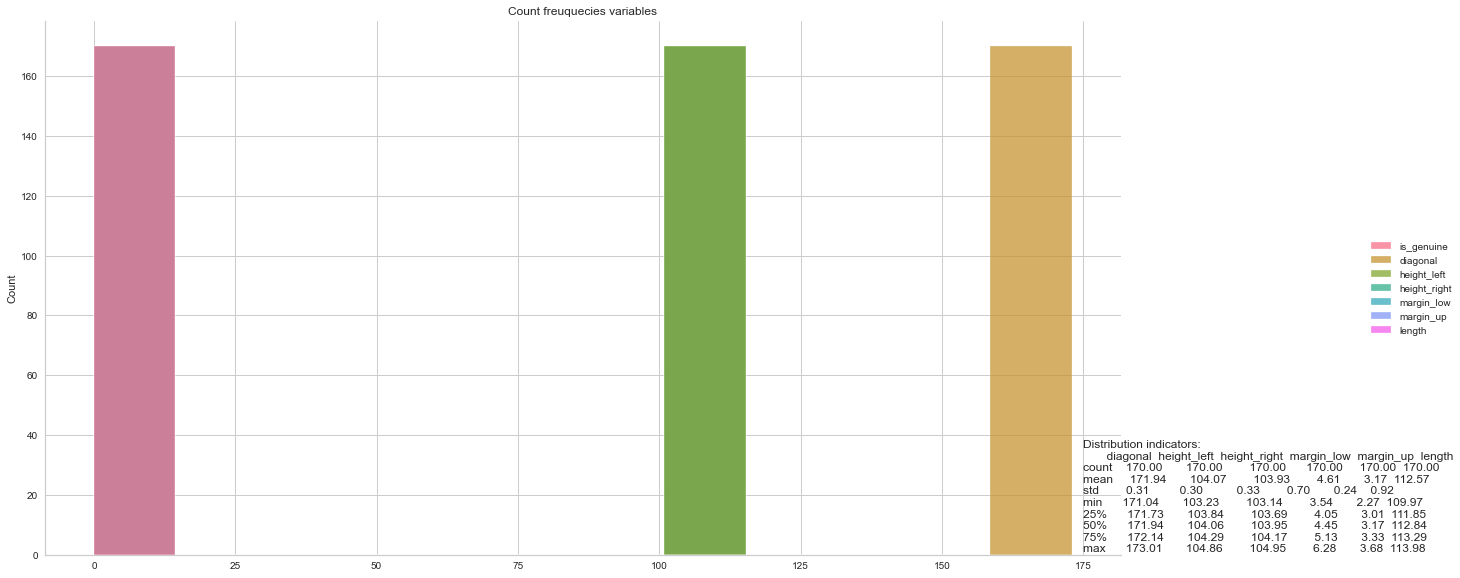

In [114]:
sns.displot(df_data, aspect=aspect, height=height).set(title='Count freuquecies variables')
plt.text(175, 1., 'Distribution indicators:\n'+ df_data.describe().round(2).to_string())
plt.show()

I am displaying the distribution of the higher values of is_genuine as categorical data.

/Users/kabuquecisouzaalves/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Count is_genuine freuquecies variables')]

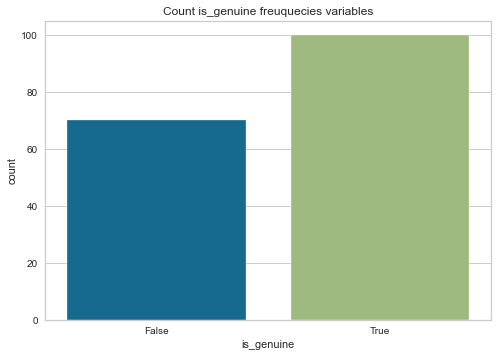

In [115]:
sns.countplot(df_data.is_genuine).set(title='Count is_genuine freuquecies variables')

# 2 Find any missing values.


As already observed, there are no false values or null-NAN; I will check it more thoroughly!

In [116]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    170 non-null    bool   
 1   diagonal      170 non-null    float64
 2   height_left   170 non-null    float64
 3   height_right  170 non-null    float64
 4   margin_low    170 non-null    float64
 5   margin_up     170 non-null    float64
 6   length        170 non-null    float64
dtypes: bool(1), float64(6)
memory usage: 8.3 KB


**Visualizing with invalid table rows.**


In [117]:
df_data.isnull()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
165,False,False,False,False,False,False,False
166,False,False,False,False,False,False,False
167,False,False,False,False,False,False,False
168,False,False,False,False,False,False,False


There are no null values in this data set!


In [118]:
"Has any null values? {}".format(not(df_data.notnull().size == df_data.size))

'Has any null values? False'

# 3 Categorize your values.


**Most of the values are numerical ones apart from is_genuine, witch is a boolean value.**

This data set is about the fiscal property of money, which are more geometrical properties and can describe numerically.

In [119]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    170 non-null    bool   
 1   diagonal      170 non-null    float64
 2   height_left   170 non-null    float64
 3   height_right  170 non-null    float64
 4   margin_low    170 non-null    float64
 5   margin_up     170 non-null    float64
 6   length        170 non-null    float64
dtypes: bool(1), float64(6)
memory usage: 8.3 KB


# 4 Find the shape of your dataset.

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


Index([<seaborn.axisgrid.FacetGrid object at 0x7fa263fe03a0>,
      dtype='object')

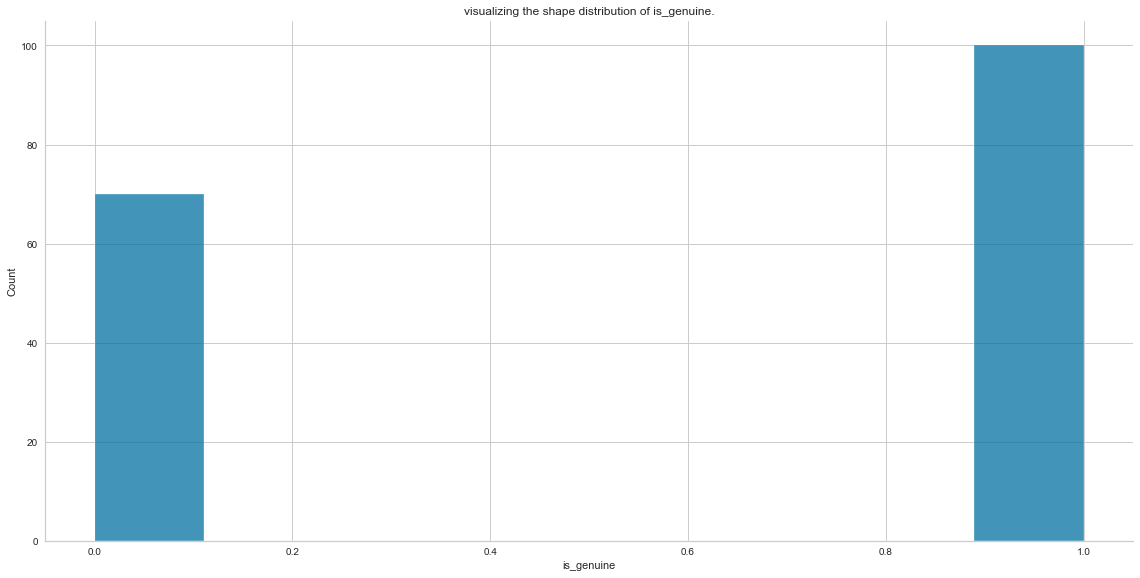

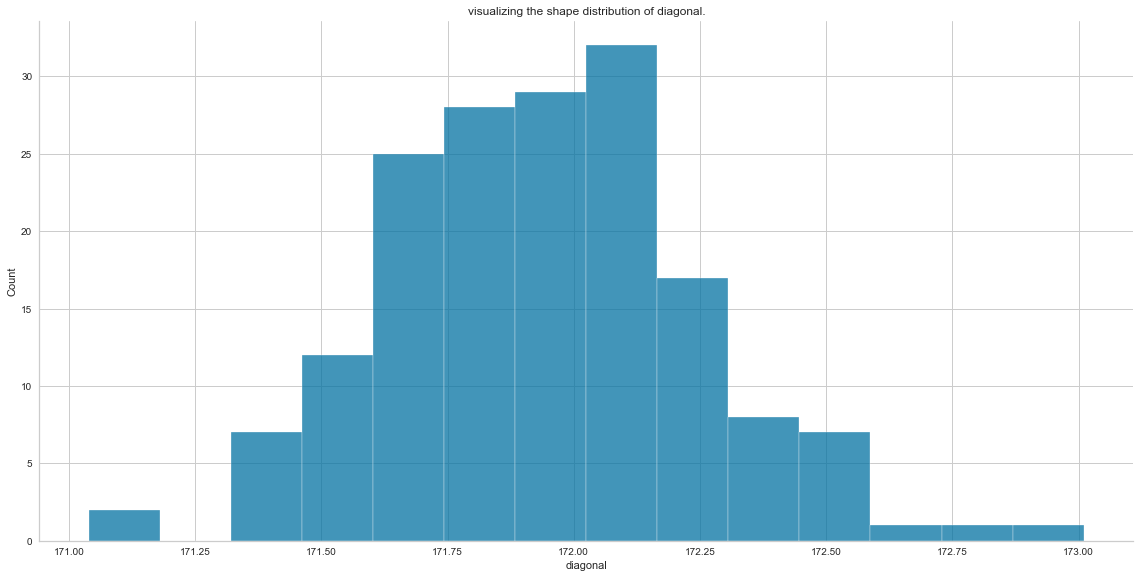

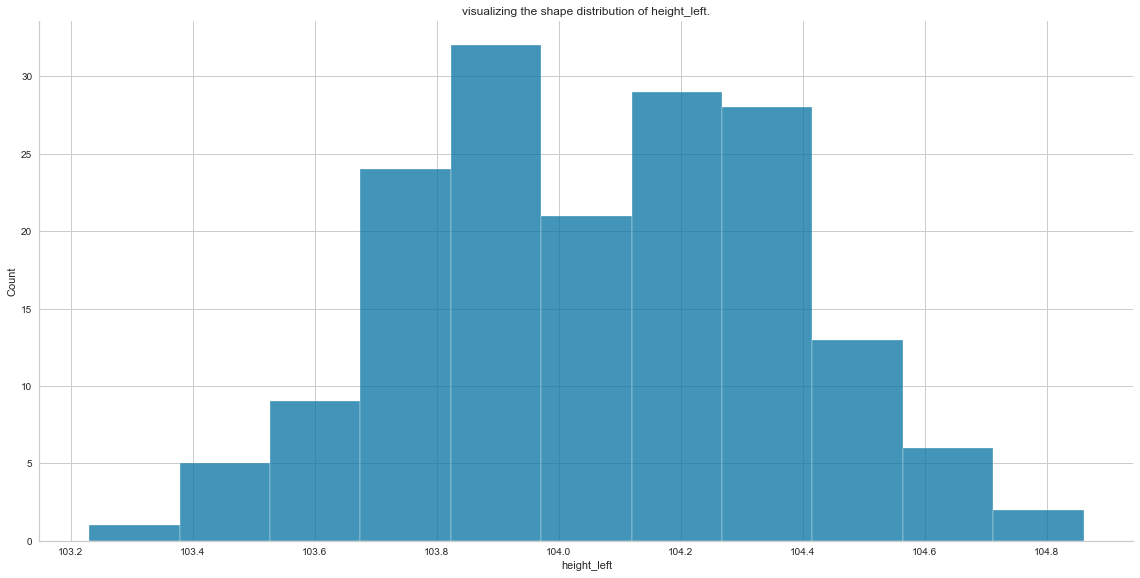

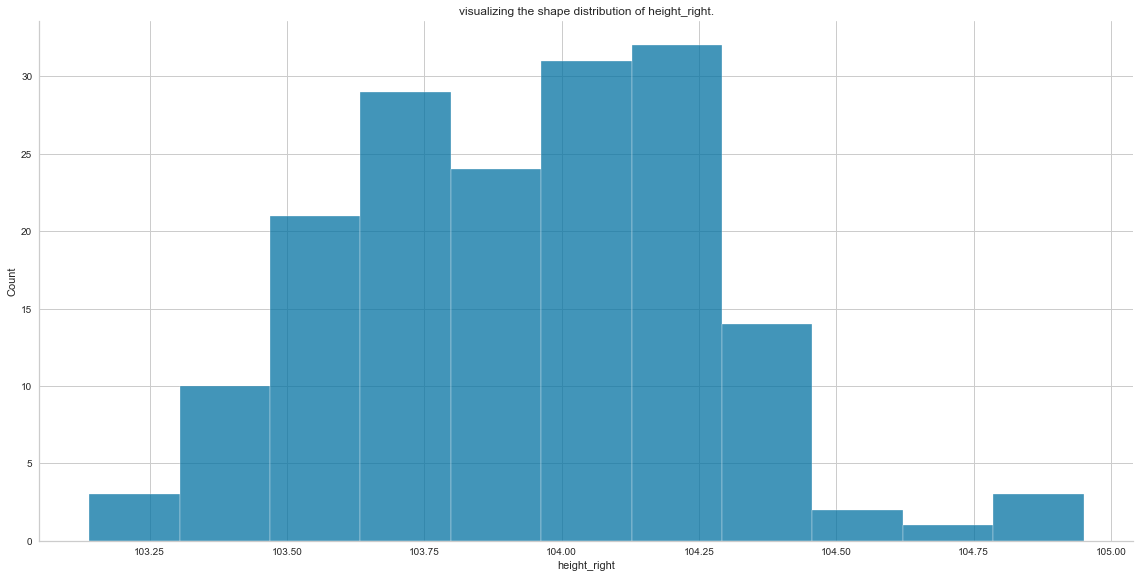

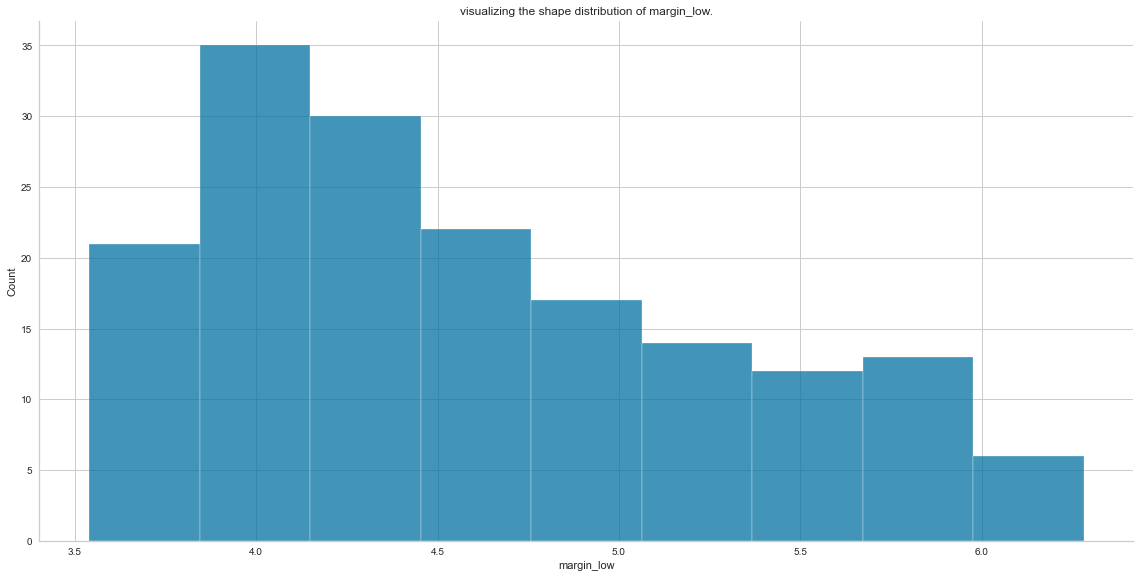

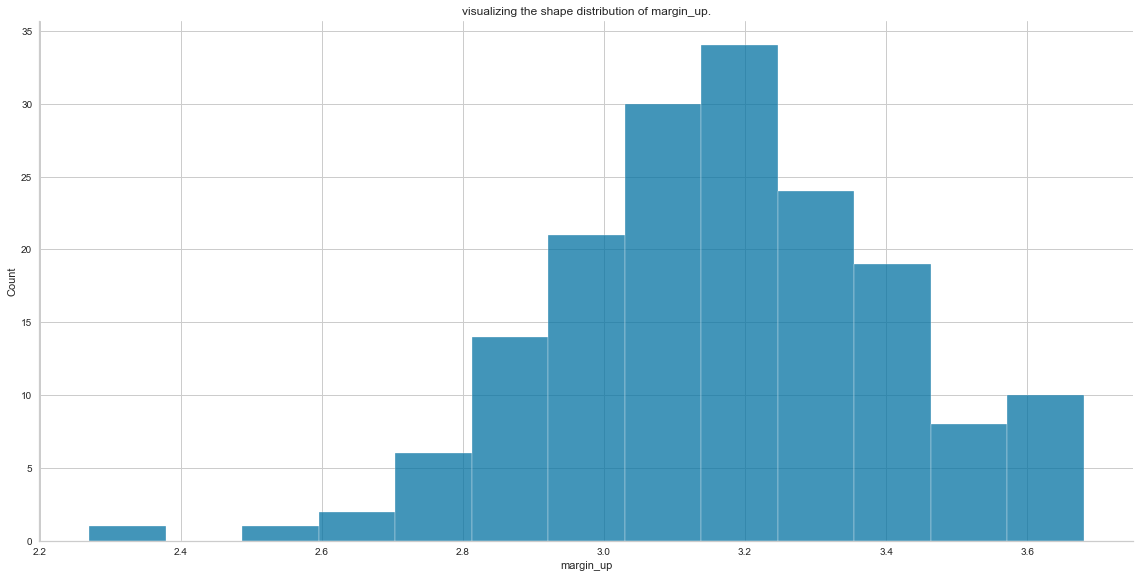

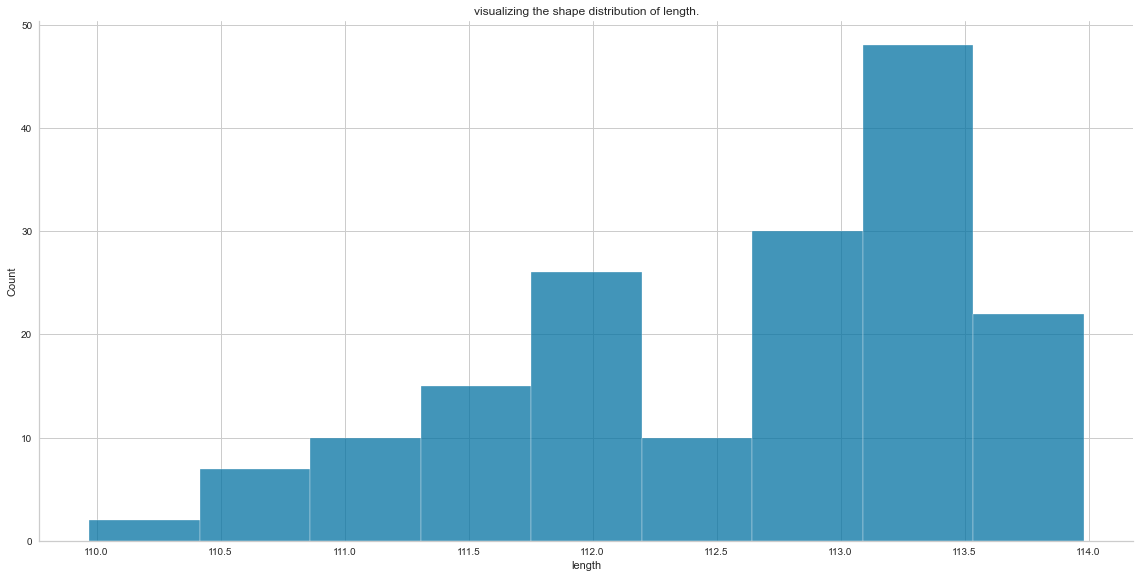

In [120]:

df_data.columns.map(lambda col: sns.displot(df_data, x=col , aspect= aspect, height=height).set(title= 'visualizing the shape distribution of {}.'.format(col)))

1. is_genuine:

 There is a significant difference in the two values distribution in this variable that can only be false and true. We will see later which one it is.

2. diagonal:

 Here the lower values are less frequent, the same for the higher values, but the central values from 171 to 172 are prevalent. lower 173 hiegher 172.

3. height_left:

 This distribution has an interesting shape with a steady increase in values from lower to higher but suddenly a decrease from 103. to 104. then increase again with value 102 to only decrease with 104.8. lowe 103 to max 103.8.

4. height_right:

 This value is quite similar to a normal distribution with its higher values in the center; here is 104.25-104.75. 

5. margin_low:

 The same here with increased and decreased then higher values but then dropping again. Higher values are 3.0-3.4 and lower 5.0-6.0.

6. margin_up:

 Margin up distribution is quite square to the left with lower and higher values. higehr are 112, 113, 113.5.

7. length:
 
 The last distribution is negatively skew with lower frequency values from 110.0 to higher 113.5.

**Most of the variables here resemble a bell shape curve, indicating that they might be coming from a normal distribution, but will be checked later!**

# 5 Identify relationships in your dataset.

**What are the relationships hidden in our data set?**

To answer this question, we must clarify what the data set represents here!

This data set represents money paper property.

What is it trying to say or identify?

In this case, if money is genuine or not.

With these assumptions, we can deduce that a particular variable influences the other features; in this case, is_genuine is that one. This one will be the relationship variable that I will consider here.

**So what is the distribution of the none output variables with the output ones?**

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


Index([<seaborn.axisgrid.FacetGrid object at 0x7fa2714ddb80>,
      dtype='object')

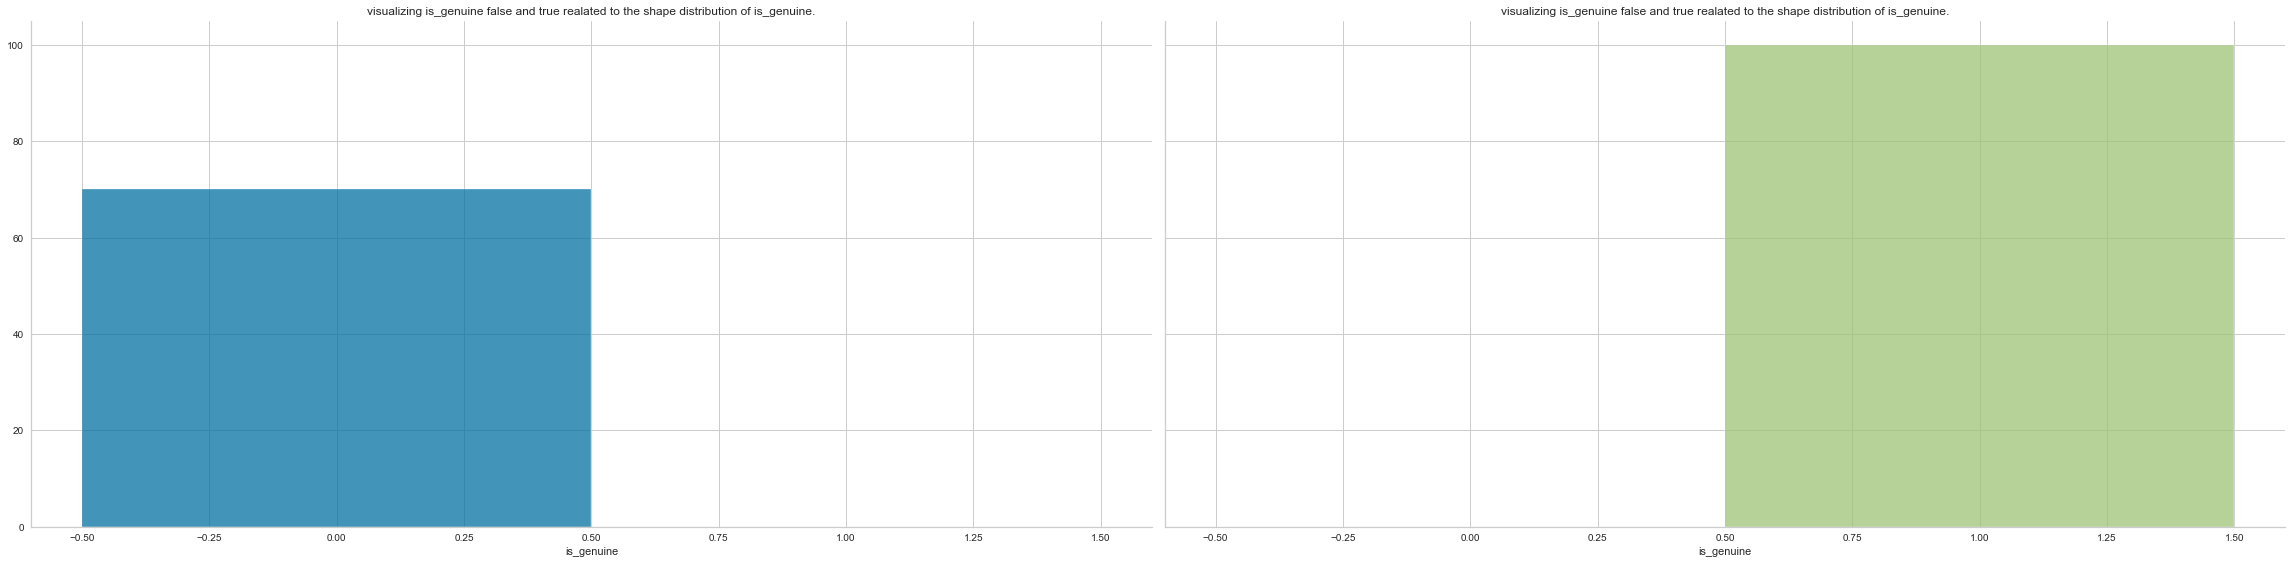

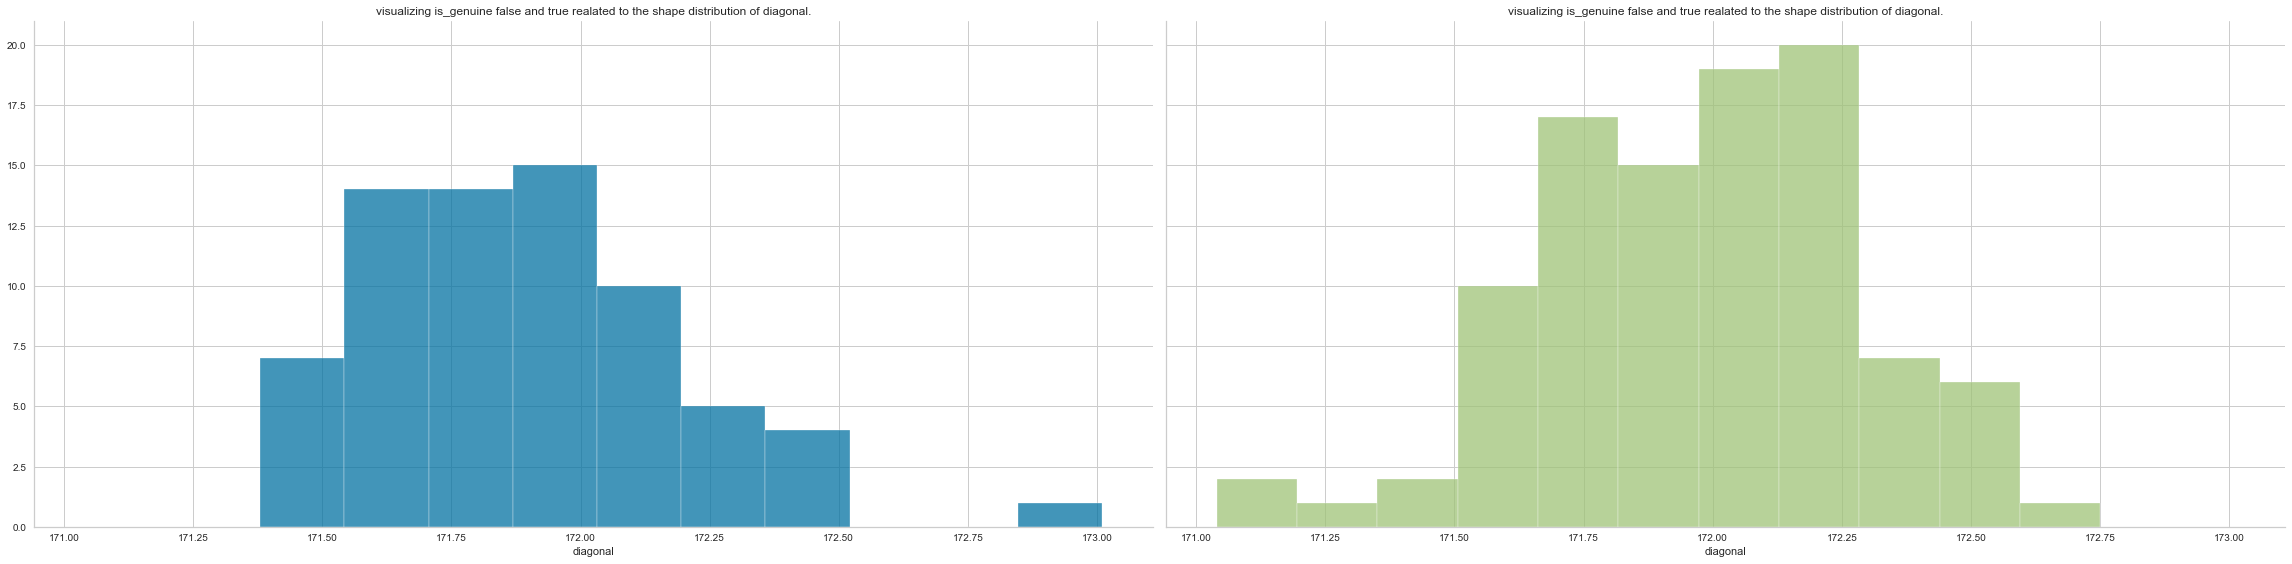

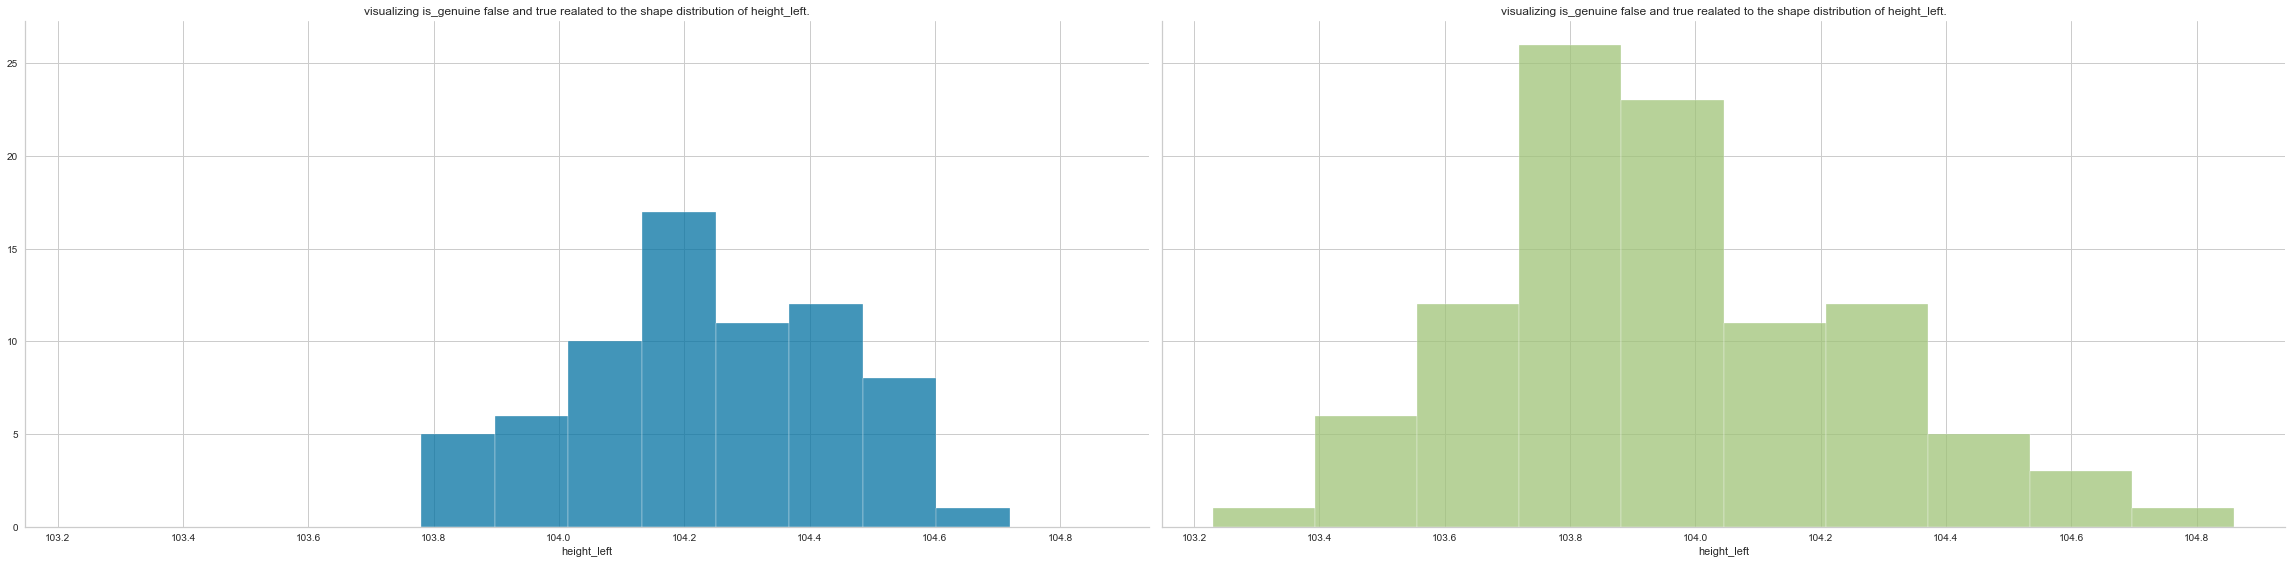

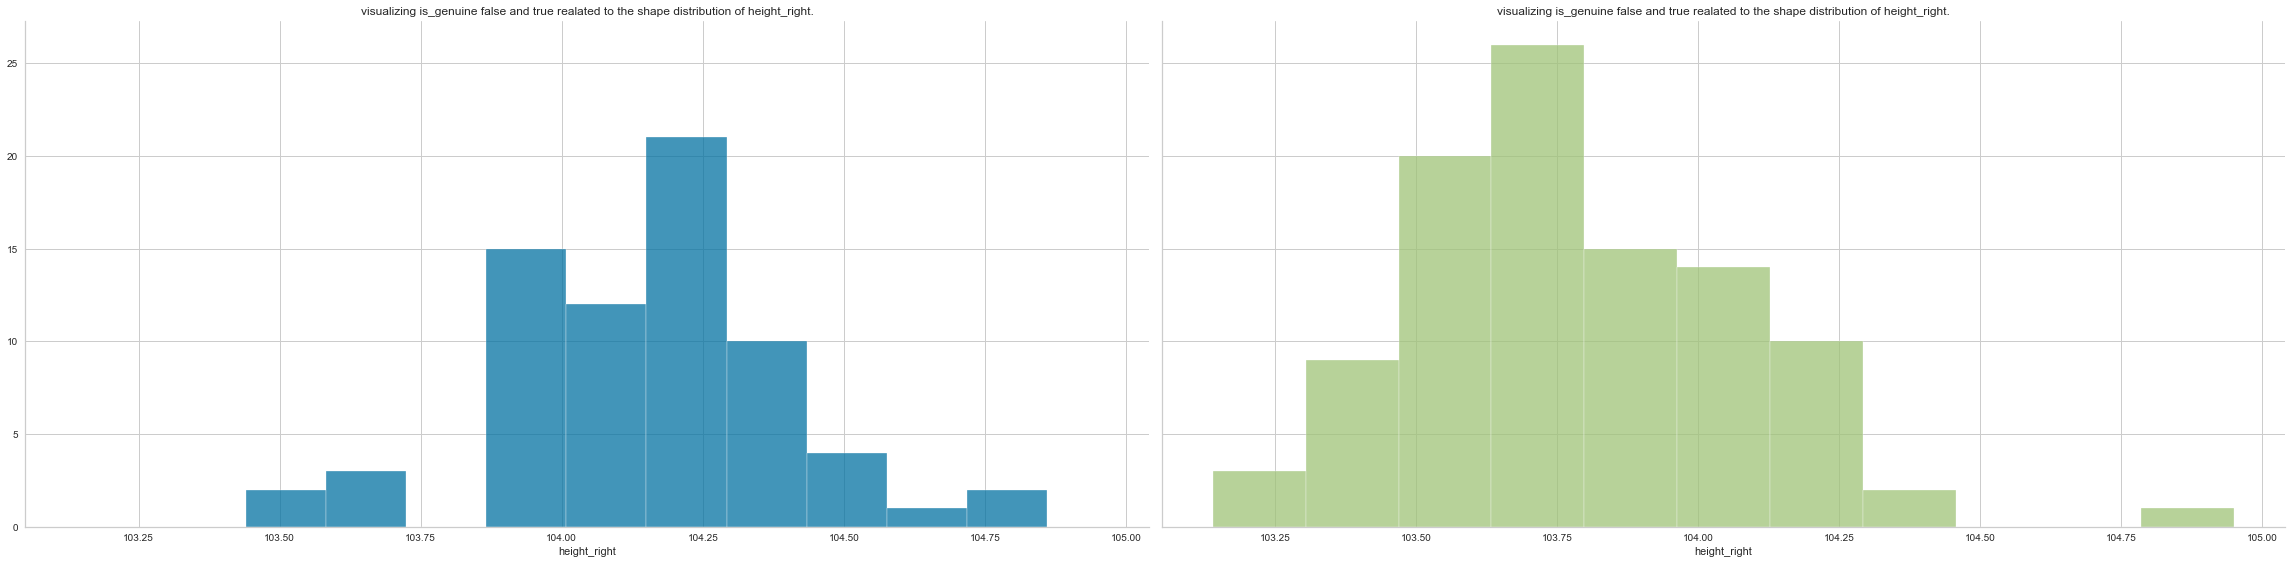

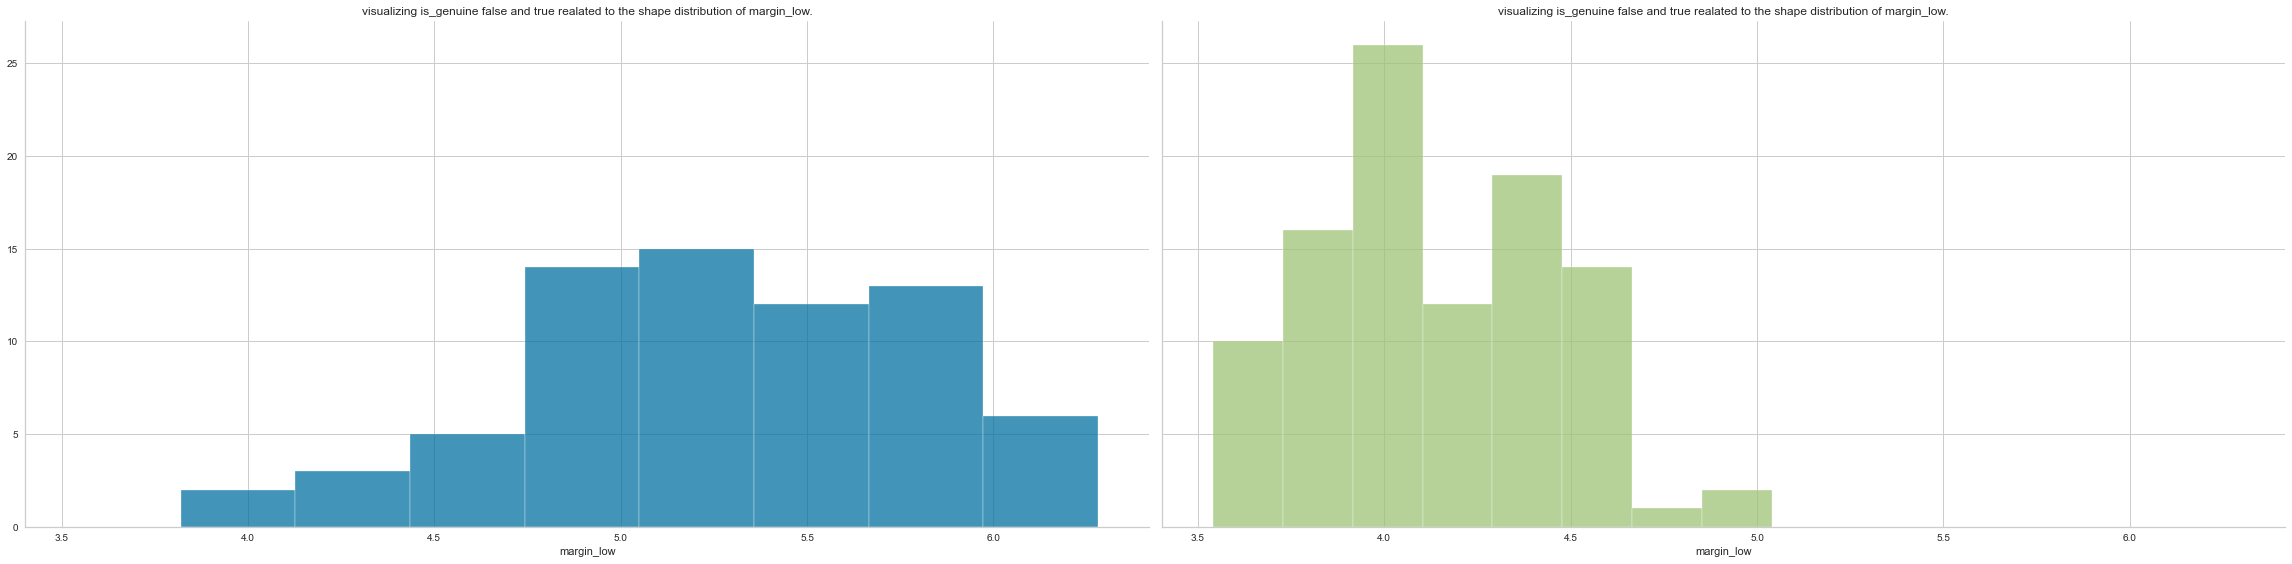

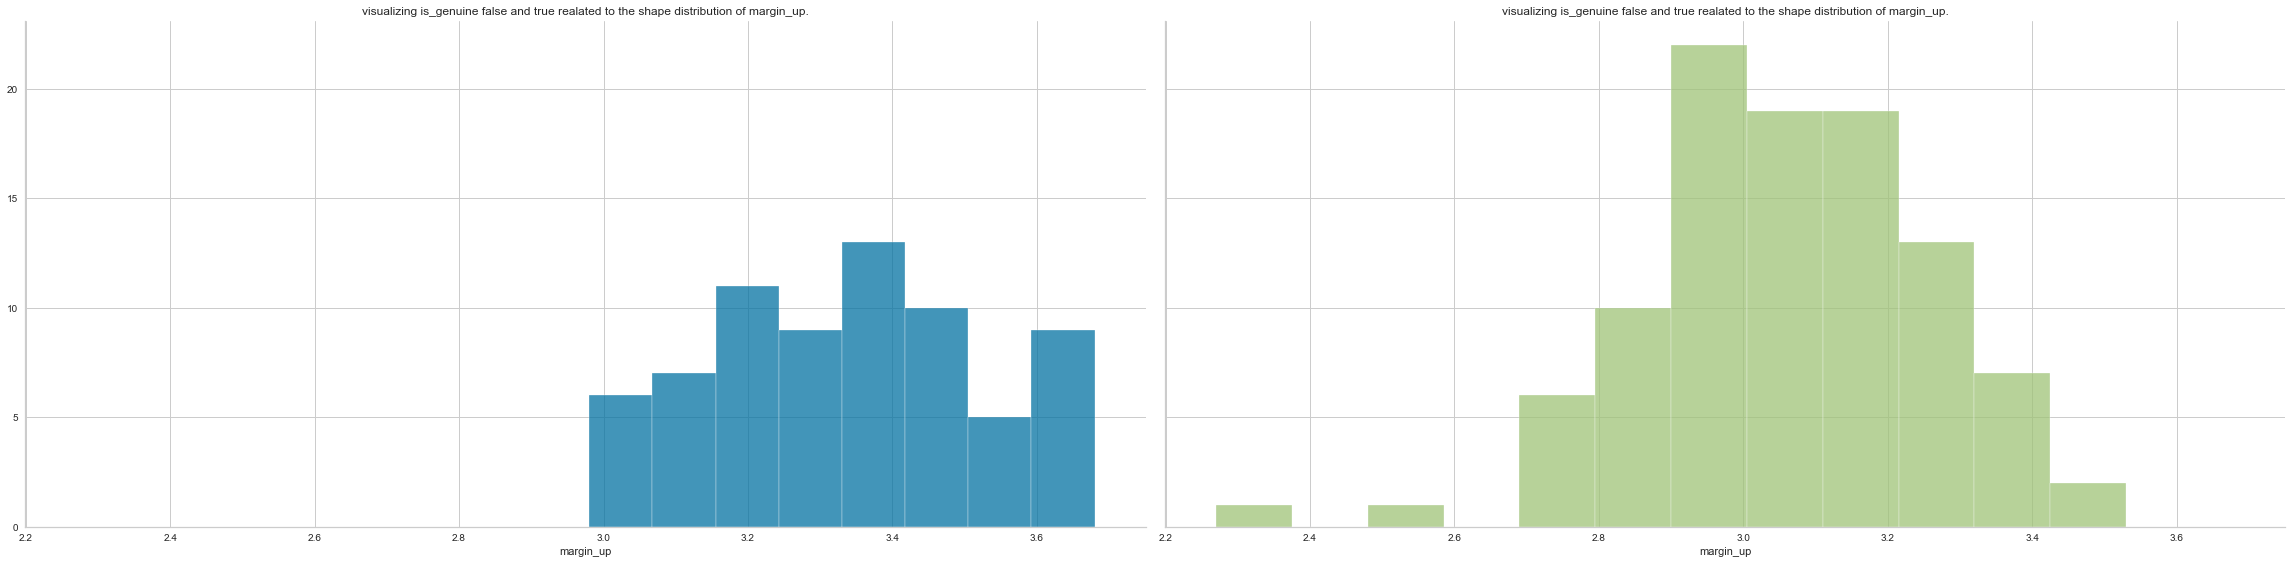

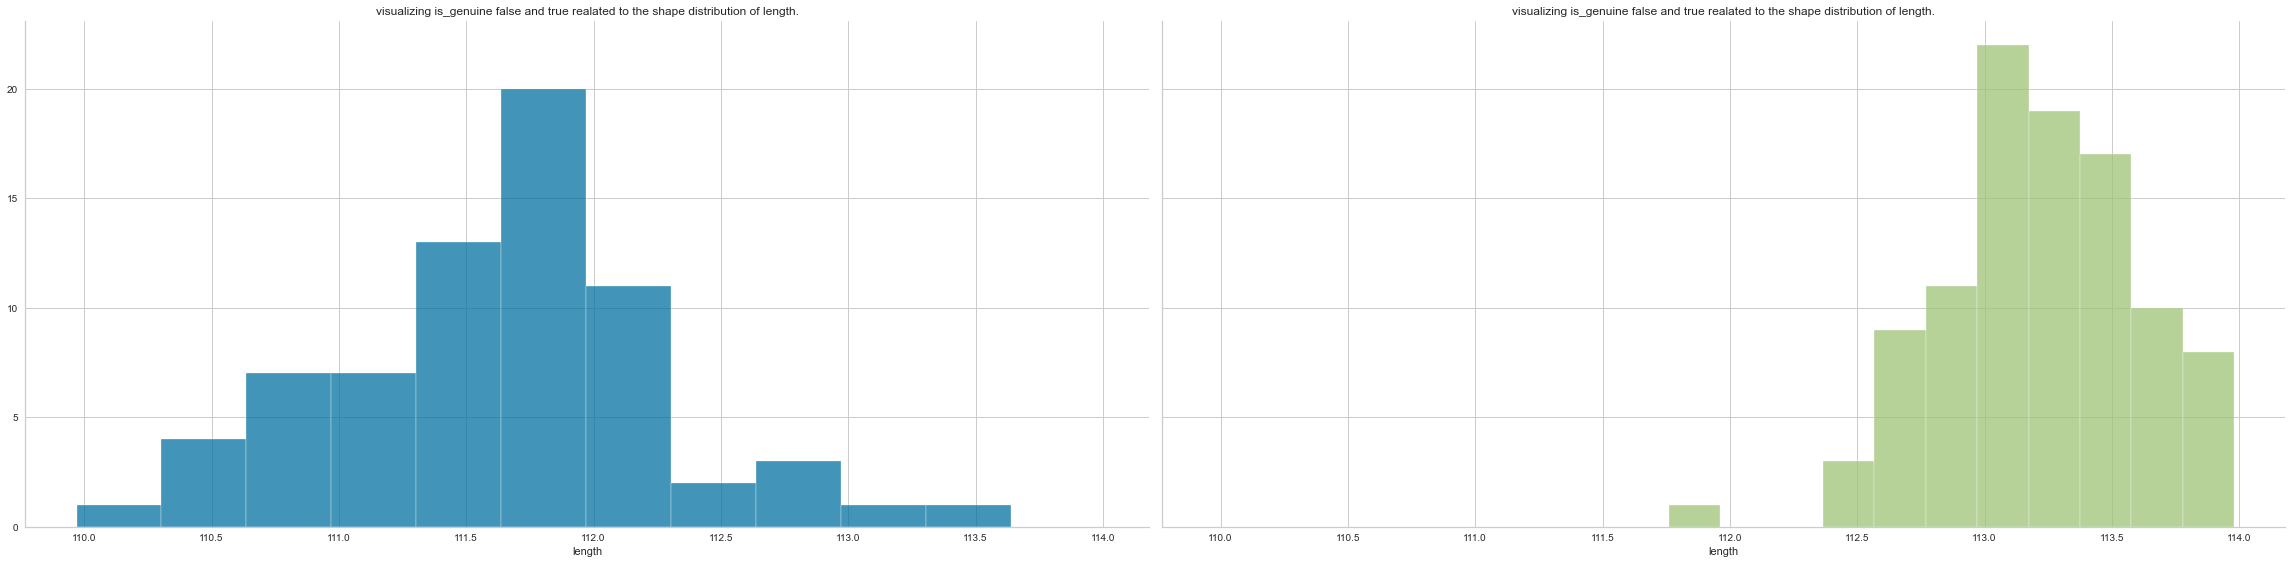

In [121]:

df_data.columns.map(lambda cols: sns.FacetGrid(df_data, col="is_genuine", hue='is_genuine', height=height, aspect=aspect).map(sns.histplot, cols).set(title= 'visualizing is_genuine false and true realated to the shape distribution of {}.'.format(cols)))


1. is_genuine:

 Count the amount of is_genuine values of true or false. Now it is clear that there are more true values than falses.

2. diagonal:

 There is a false value under 172 and more, and the most frequent values above 172 are true.

3. height_left:

 There are more false values between 104.0-104.5 and more true from 103.10-104.0.

4. height_right:

 Here we see false values from 104.0-104.4, and more trues from 103.5-104.4.

5. margin_low:

 Here, we see more values from 4.4 to 6 that is false and a lot of true between 3.5 and 5.

6. margin_up:

 There are more falses from 3.0-3.5 and more true values closer to 3.0.

7. length:
 
 Finally, there are many false values from 112 instead of 112.5-114.

**There are more frequencies of false and true values in specific ranges. This could mean that there is a clear distinction between values grouped as false and true. We may see this clearly by clustering.**

# 6. Locate any outliers in your dataset.

/Users/kabuquecisouzaalves/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/kabuquecisouzaalves/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/kabuquecisouzaalves/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/kabuquecisouzaalves/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/kabuquecisouzaalves/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: Us

Index([<seaborn.axisgrid.FacetGrid object at 0x7fa2329eafa0>,
      dtype='object')

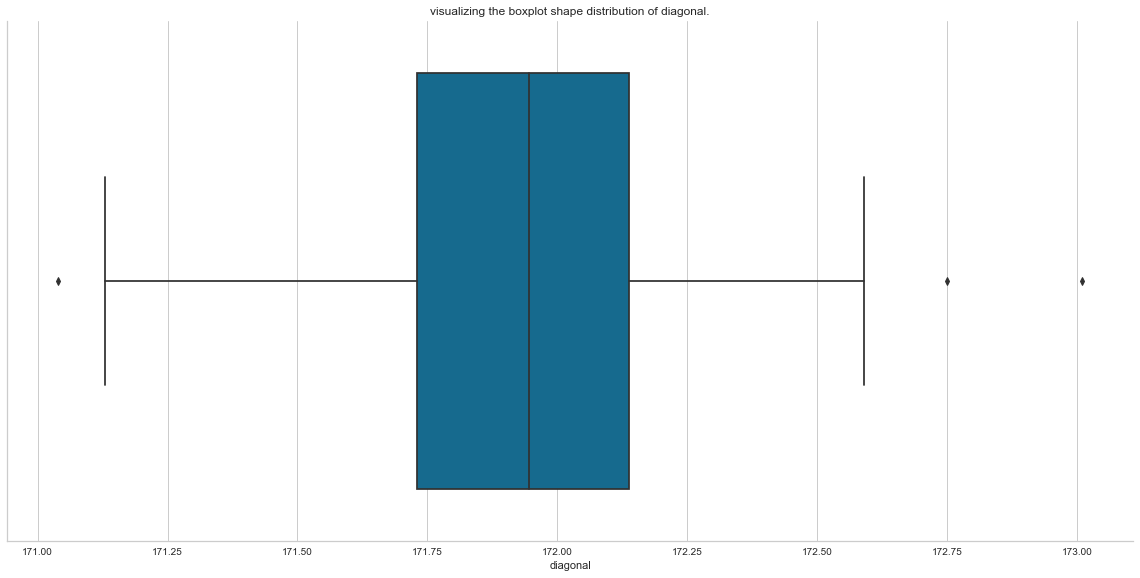

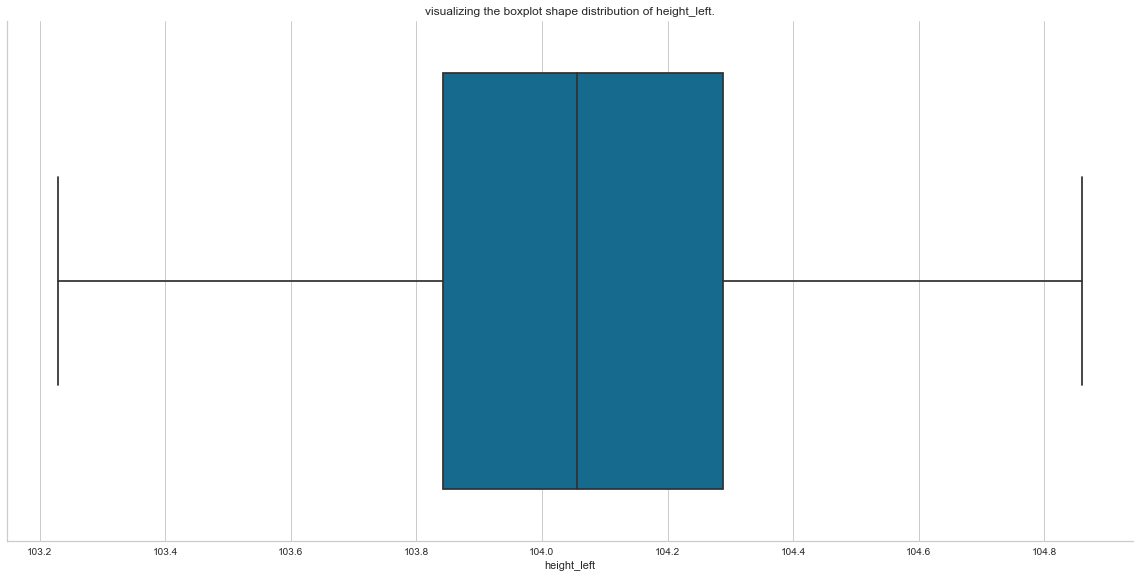

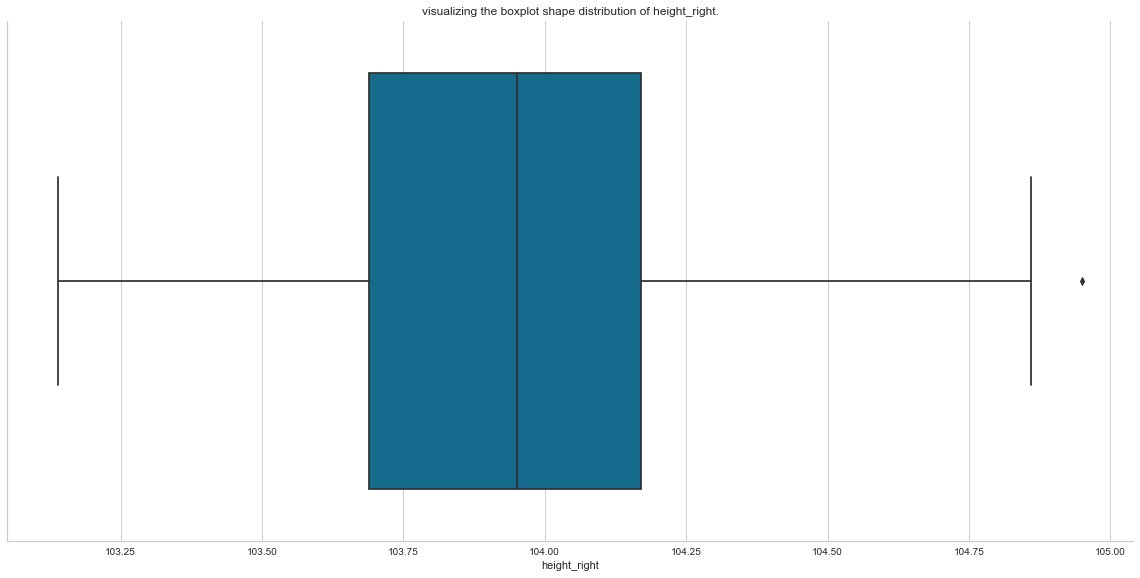

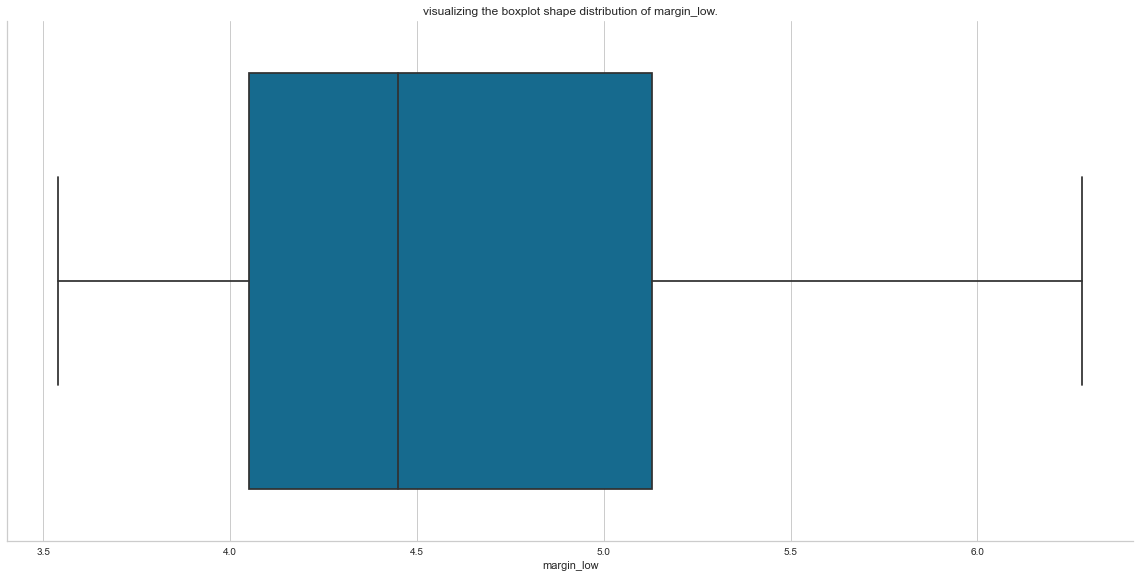

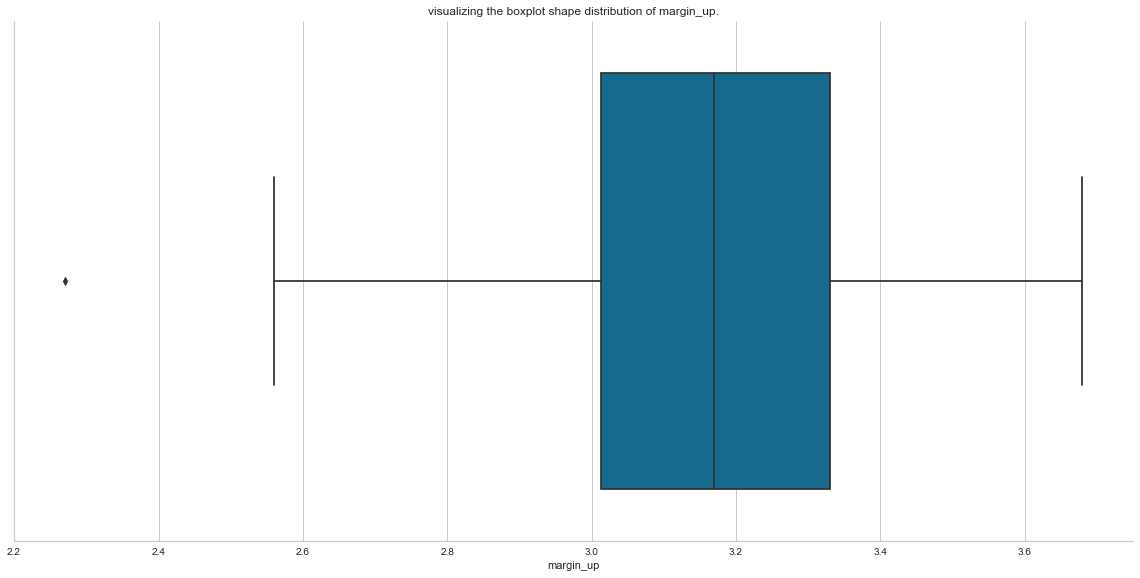

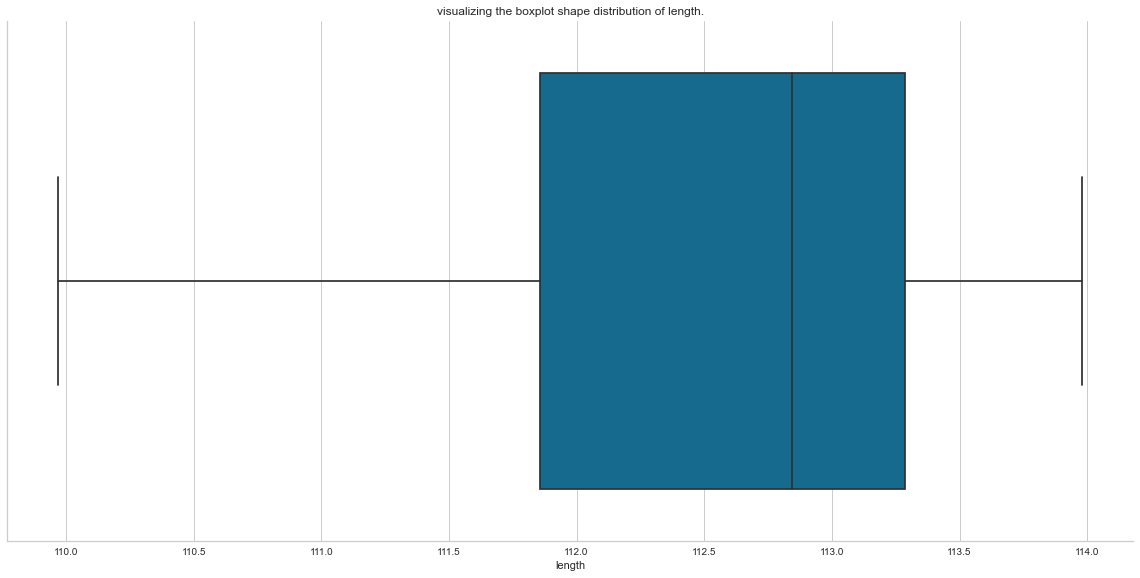

In [122]:

df_data[df_data.columns[1:]].columns.map(lambda col: sns.FacetGrid(df_data[df_data.columns[1:]], height=height, aspect=aspect).map(sns.boxplot, col ).set(title= 'visualizing the boxplot shape distribution of {}.'.format(col)))

1. diagonal:

 Here is more apparent that most of the values are close to 172 171 as 172 so close to the median, and 173 and 171 are the most outliers.
 
 Its min value is close to 171, and its max is more relative to 172. Its Q1 is more than 171, its median is more than 171, and its Q3 is more than 172.

2. height_left:

 There are no apparent outliers here. The values close to the mean here are close to 104. Outliers are more relative to 103 and 10.4.5.

 Its min value is close to 103, its max closer to 104, its Q1 is more than 103, its median is 104, and its Q3 104.


3. height_right:

 Here instead, 103.0 is a little close to the mean; values are more shifted toward lower values, but the value close to the mean is also 104. Some values closer to 105 are an outlier.

 Its min value is close to 103, and its max is closer to 104; its Q1 is more than 103, its median is 103, and its Q3 is 104. 


4. margin_low:

 The values close to the median here are 4.0-4.4; the mean is shifted to low values. There are no apparent outliers here.

 Its min value is close to 3, and its max is closer to 6; its Q1 is more than 4; its median is more than four, and its Q3 to 5. 
 

5. margin_up:

 Most of the values here are close to the mean and shift to higher ones; lower ones are mostly outliers -2.4 values closest to the mean are from 3.0-3.3.

 Its min value is close to 2, and its max is more than three; its Q1 is closer to 3, its median is closer to 3, and its Q3 is more than 3. 


6. length:
 
 Most outliers here are lower values close to 111. The mean is shifted to higher values close to 113. There are no apparent outliers here.

 Its min value is close to 110, its max is more than 114; its Q1 is closer to 112; its median is closer to 112; and its Q3 is more than 113.

**Diagonal and the two heights are most of their values around the mean**

I can not say the same for margins and length; margins means is shifted in the opposite direction.

height_right has more outliers, and margin_up have the most spread outliers.

# Task 1

**Briefly describe the data at hand with univariate and bivariate analyses.**

## Univariate analyses.

In [123]:
def plotUnivariantindicators(col= ''):
    return {'median': df_data[col].median(), 'kurtosis': df_data[col].kurtosis(), 'skewness': df_data[col].skew(), 'mode': df_data[col].mode(), 'standard deviation': df_data[col].std()}

**displaying Univariant statistical indicators.**

In [124]:
univariant_indicators = pd.DataFrame(list(map(plotUnivariantindicators, df_data.columns)), index=df_data.columns)
univariant_indicators

,median,kurtosis,skewness,mode,standard deviation
is_genuine,1.000,-1.891517,-0.361769,0 True dtype: bool,0.493607
diagonal,171.945,0.586844,0.196167,0 172.1 dtype: float64,0.305768
height_left,104.055,-0.461713,0.028648,0 104.17 1 104.32 dtype: float64,0.298185
height_right,103.950,-0.004884,0.168886,0 103.76 1 104.06 dtype: float64,0.330980
margin_low,4.450,-0.743786,0.584859,0 3.97 1 4.08 dtype: float64,0.702103
margin_up,3.170,0.549241,-0.204313,0 3.07 1 3.24 dtype: float64,0.236361
length,112.845,-0.533677,-0.656478,0 113.38 dtype: float64,0.924448


**We already observed some statistical indicators, but not all, especially the ones for a measure of central tendency ones:**

1. is_genuine:
 Has a median of 1 for its categorical value and a negative kurtosis indicating fewer outliers and a low peak; its skewness indicates it's negative and slightly unsymmetric, and its mode as categorical value is only 0 with a standard deviation of 49%, close to the mean. 

2. diagonal:

 Has a median of 171.94, a positive kurtosis indicating a moderate peak in some outliers; its skewness suggests a positive, relatively symmetric distribution; its mode is close to its median value with a standard deviation of 30%, close to the mean, not very spread. 

3. height_left:

 Has a median of 104.05, a negative kurtosis indicating moderate peak and fewer outliers, its skewness indicates a positive, quite symmetric distribution, and its mode is slightly away from its median value with a standard deviation of 29%, close to the mean, not very spread. 


4. height_right:

 Has a median of 103.95 also has a negative kurtosis indicating a moderate peak but could have some outliers; its skewness indicates its positive is quite symmetric, and its mode is close to its median value with a standard deviation of 33%, relative to the mean not very spread. 


5. margin_low:

 It has a median of 4.45, a negative kurtosis indicating a moderate peak but could have some outliers. Its skewness suggests it is positive and relatively symmetric. Its mode is close but lower than its median value with a standard deviation of 70%, relative to the mean very spread. 


6. margin_up:

 It has a median of 3.170, a positive kurtosis indicating moderate peak and fewer outliers; its skewness indicates it's negative and slightly unsymmetric, and its mode is close to its median value with a standard deviation 23%, close to the mean, not very spread. 


7. length:

 Has a median of 112.84, a negative kurtosis indicating moderate peak but could have some outliers, its skewness indicates it's negative and slightly unsymmetric, and its mode is close to its median value with a standard deviation of 90%, relative to the mean very spread.

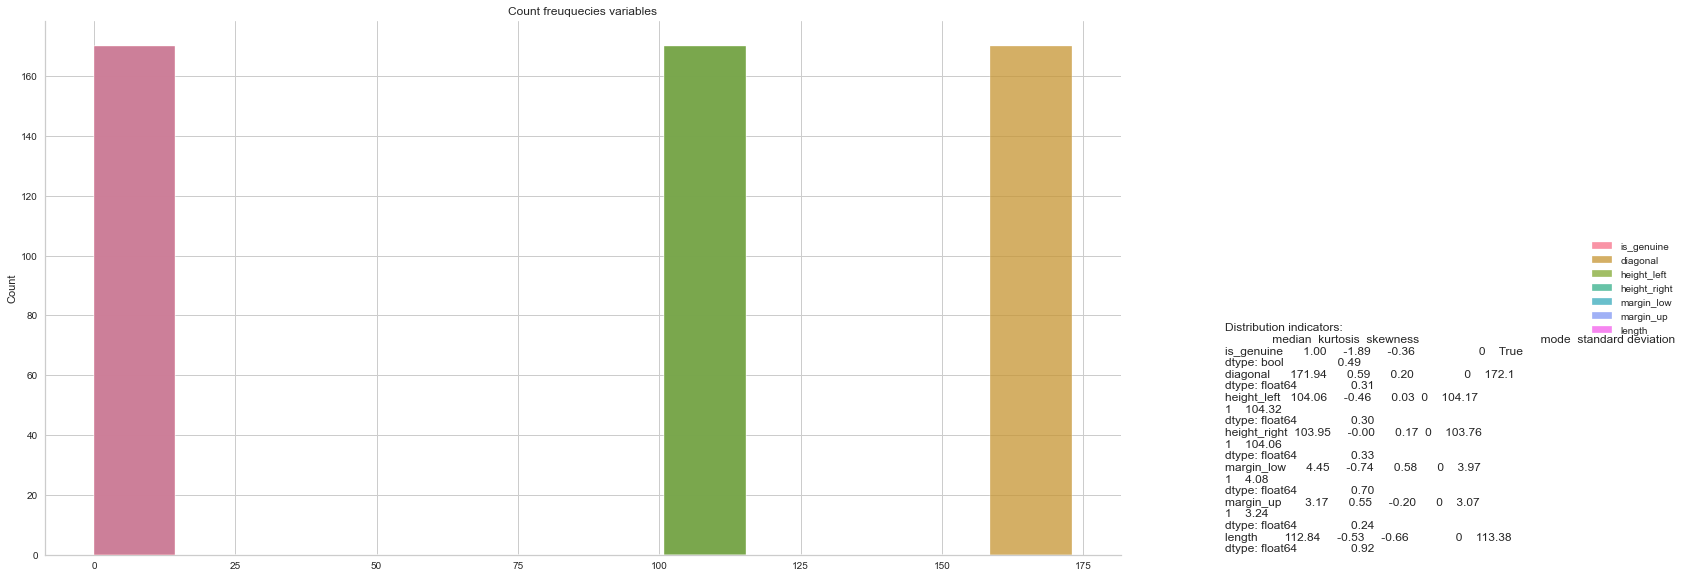

In [125]:
plot = sns.displot(df_data, aspect=aspect, height=height).set(title='Count freuquecies variables')
plt.text(200, 1., 'Distribution indicators:\n'+ univariant_indicators.round(2).to_string())
plt.show()

**Here we see the top higher value that is present in is_genuine, height_left, and diagonal as top 1,2,3.**


/Users/kabuquecisouzaalves/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Amount of true and false.')]

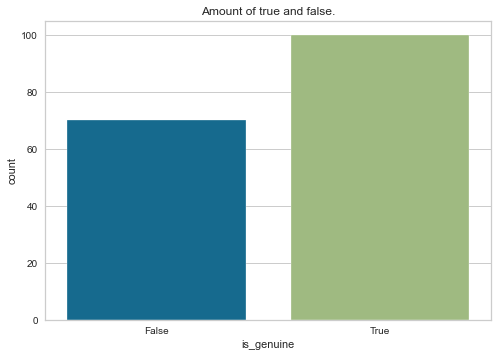

In [126]:
sns.countplot(df_data.is_genuine).set(title='Amount of true and false.')

This was already observed before in this analysis; nevertheless, I am more focused on the imbalance of genuine true vs. false.

There is more clear truth than false!


In [127]:
print(df_data.is_genuine.describe())

count      170
unique       2
top       True
freq       100
Name: is_genuine, dtype: object


**As already seen, most genuine values are true instead of false. This means there is something like 30 more true values compare to false ones.**

### Checking distribution type.
**Is our data set variable a normal distribution?**

**Here, I am carrying on a statistical test of all Variables created so far.**

Had the ALPHA value been defined as 0.05, the hypothesis is "H0: {Variable} is Normal distribution!" In the other case, if it is less than the ALPHA value, "H1: {Variable} is not a Normal distribution!"

In [128]:
# defining the Shapiro test function that will create a dictionary and be used to display a data frame of results.

def normal_shapiro_test( df: DataFrame, column = ""):
    tested = stats.shapiro(df_data[column])
    return {"variable": column, "statistic": tested.statistic, "pvalue": tested.pvalue, 
    "hypothesis": "H0: {} is a Normal distribution!".format(column) if tested.pvalue > 0.05 else "H1: {} is not a Normal distribution!".format(column) }

In [129]:
pd.DataFrame(list(map(lambda c: normal_shapiro_test(df_data, c), df_data.columns)))

,variable,statistic,pvalue,hypothesis
0,is_genuine,0.624988,3.946073e-19,H1: is_genuine is not a Normal distribution!
1,diagonal,0.993177,6.106325e-01,H0: diagonal is a Normal distribution!
2,height_left,0.992723,5.533670e-01,H0: height_left is a Normal distribution!
3,height_right,0.988121,1.625284e-01,H0: height_right is a Normal distribution!
4,margin_low,0.935401,6.225721e-07,H1: margin_low is not a Normal distribution!
5,margin_up,0.988917,2.044352e-01,H0: margin_up is a Normal distribution!
6,length,0.932463,3.714225e-07,H1: length is not a Normal distribution!


**We clearly see that length and is_genuine is not a normal distribution.**

Before applying it, we must standardize the data set to proceed with our predictable analysis.

## Bivariate analyses.


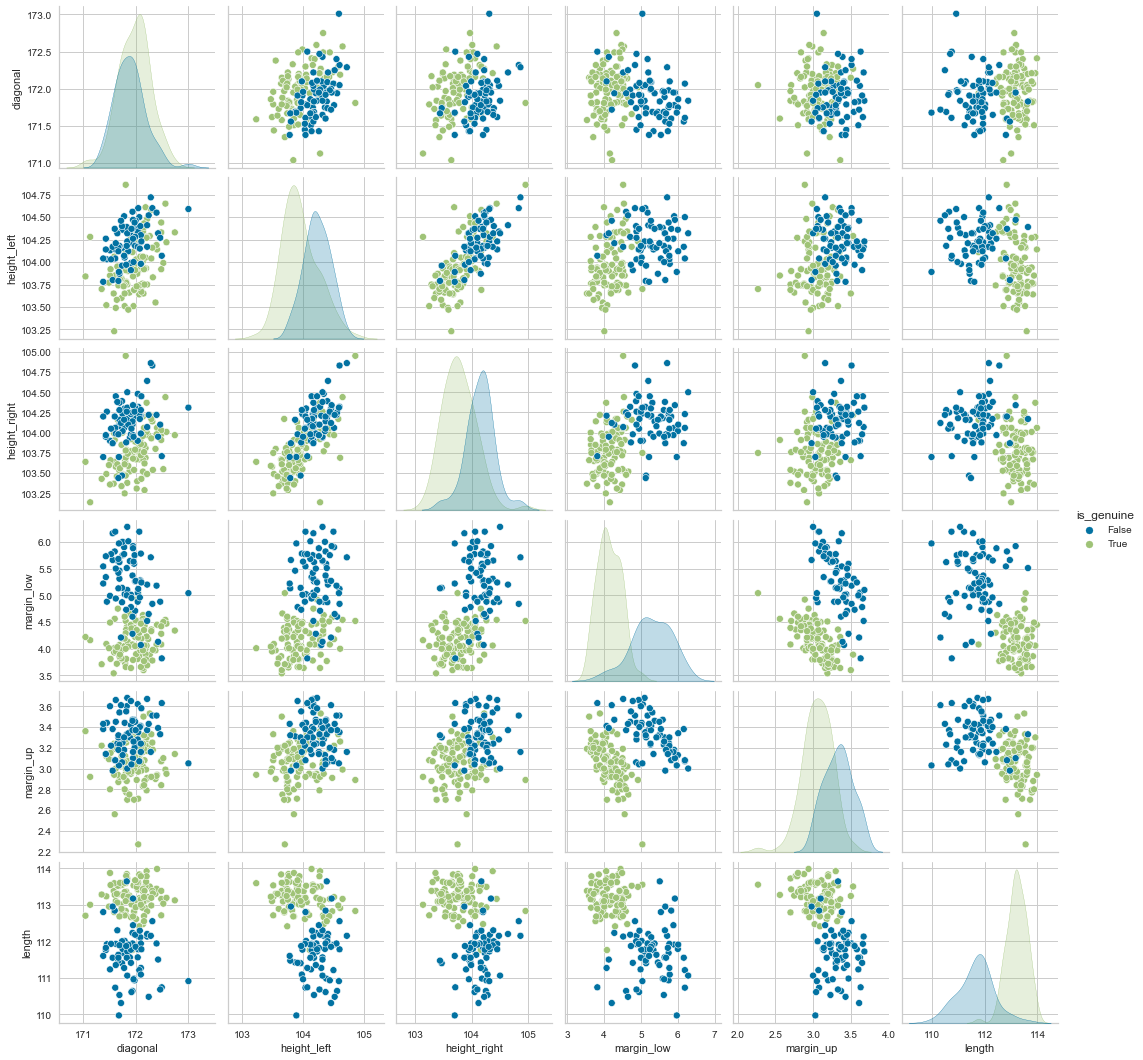

In [130]:
sns.pairplot(df_data, hue='is_genuine')

1. diagonal:

 Most of the is_genuine values in the independent variables have a true outlier height_left is the most correlated, but it's still weak false are negative, and most trues are positive.
 
 For most of its independent variables compare to its self as dependent ones:

 Its direction is positive, and it has a quite linear form. Its strengths are weak and have some outliers.

2. height_left:

 Diagonal, as mentioned above, are quite correlated; height_right is strongly correlated, not the same for the others, especially length; the true values are most positive on more strong ones.

 For most of its independent variables compare to its self as dependent ones:

 Its direction is positive, it has a very linear form, its strengths are moderate, strong, and others weak, and it has some outliers. 

3. height_right:

 Less correlation with diagonal and strongly correlated with height_left is_genuine values are mostly more negative, but overall they are positive; for the others, they are weakly correlated, especially length.

 For most of its independent variables compare to its self as dependent ones:

 Its direction is positive for most True values, has a very linear form; strengths are weak, strong, and others weak, and has some outliers. 

4. margin_low:

 No strong correlation is observed here. The is_genuine values false and true are for diagonal slightly negative and very spread with margin_up and length. True values are higher than false ones.

 For most of its independent variables compare to its self as dependent ones:

 Its direction is most positive for true values but not for false ones and negative for margin_up; it has a very linear form; its strengths are one moderated, moderated, moderated, and others weak, and it has some outliers. 

5. margin_up:

 The dependent and independent variables here are very weakly correlated; its is_genuine are lower. Comparing margin_up and length, the true and false are quite spread.

 For most of its independent variables compared to its self as dependent ones:

 Its direction is most positive for true values but not for false ones and negative for margin_low; it has a very linear form. Its strengths are moderated, strong, and others weak, and it has some outliers. 

6. length:
 
 This last one is very uncorrelated with all variables. The is_genuine values are very spread and in margin_low very distinct in terms of high and low values. Its direction, so to speak, is neutral but is slightly more positive for lucking of a better word! False and true are very distinct, with false being higher and true lower.

 For most of its independent variables compare to its self as dependent ones:

 Its direction is positive, and there are some negatives with true values; it has a very linear form, its strengths are quite weak, and it has some outliers.

**Here, we could see the correlation Matrix between all variables in relation to each other by is_genuine values. Most of them do not correlate.**

Some values are very spread; this is also because they express very different features of the object that our data set described here, but still, we could find some correlation; these ones will be checked later in the analysis.

# Task 2

**Carry out a principal component analysis of the sample:**

* Analyzing eigenvalues scree plot.
* Representing variables using correlation circles.
* Representing individuals using factorial planes.
* Analyzing the representation quality and the contribution of individuals.

## Dimensionality reduction using PCA.

**Filtering all numerical variables from the data set.**


In [131]:
df_data_numerical = df_data.iloc[:, 1:7]

In [132]:
# Standardize the data and create the scaler variable.
# remove the output var is_genuine.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_data_numerical)
X_scaled

array([[-0.42834385,  2.6694537 ,  3.09656321, -0.13159013, -1.18987367,
         0.28163308],
       [-0.88755932, -1.09769709, -0.69125444, -0.86012554, -1.27473985,
         0.78069736],
       [-0.36274164, -1.03042654, -0.50943919, -0.30301023, -1.23230676,
         1.37740465],
       ...,
       [ 1.73652911,  0.68497248,  0.52084721,  0.38267015,  0.67718214,
        -2.05094997],
       [-0.39554274, -0.32408577, -0.1458087 ,  0.16839504,  1.61071005,
        -0.75989238],
       [ 0.06367273, -0.22317994,  0.06630909,  1.45404575,  0.38015054,
        -1.74717171]])

In [133]:
# Add the variable to a cluster data frame.
x_clustered = pd.DataFrame(X_scaled, index= df_data.index, columns= df_data_numerical.columns)

x_clustered.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,-0.428344,2.669454,3.096563,-0.131590,-1.189874,0.281633
1,-0.887559,-1.097697,-0.691254,-0.860126,-1.274740,0.780697
2,-0.362742,-1.030427,-0.509439,-0.303010,-1.232307,1.377405
3,-0.461145,-0.963156,-0.842767,-1.260106,-0.213913,1.149571
4,0.358883,-1.232238,-0.539742,0.611230,-3.820725,1.062777


**Creating the PCA and the reduced variable**


In [134]:
# Creating the PCA and its transformation.
pca = PCA(n_components = X_scaled.shape[1])
pca.fit(X_scaled)
x_reducer = pca.transform(X_scaled)
x_reducer

array([[ 2.15363875,  1.59970945,  1.78745079,  2.43346523,  0.69968952,
        -1.26770217],
       [-2.11041589, -0.52603892,  0.54256277,  0.34454951,  0.0674404 ,
        -0.54460079],
       [-1.97315242, -0.04810178,  0.85871563,  0.37481231, -0.4248861 ,
         0.08048667],
       ...,
       [ 2.06724502,  0.84560244, -0.61028227, -1.71417169,  0.1169579 ,
        -0.50433787],
       [ 0.73925685, -0.97296457, -1.35977212, -0.19173617, -0.24355701,
         0.21142914],
       [ 1.50499242, -1.07972486,  0.18888855, -1.34755225, -0.2891493 ,
        -0.06034599]])

**Checking the number of components created by the PCA.**


In [135]:
# The number of components created from PCA n_components is 6.
pca.n_components_

6

**Checking the ratio of the variance.**


In [136]:
pca.explained_variance_ratio_

array([0.47447921, 0.21957106, 0.14234524, 0.08526295, 0.04612822,
       0.03221331])

#### Scree plot, What are the number of components that is relevant to our PCA?


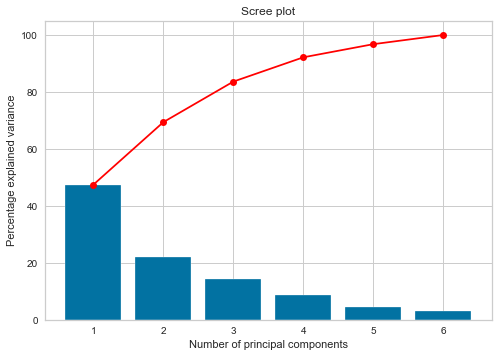

In [137]:

display_scree_plot(pca)

#### Factorial plane of PCA.


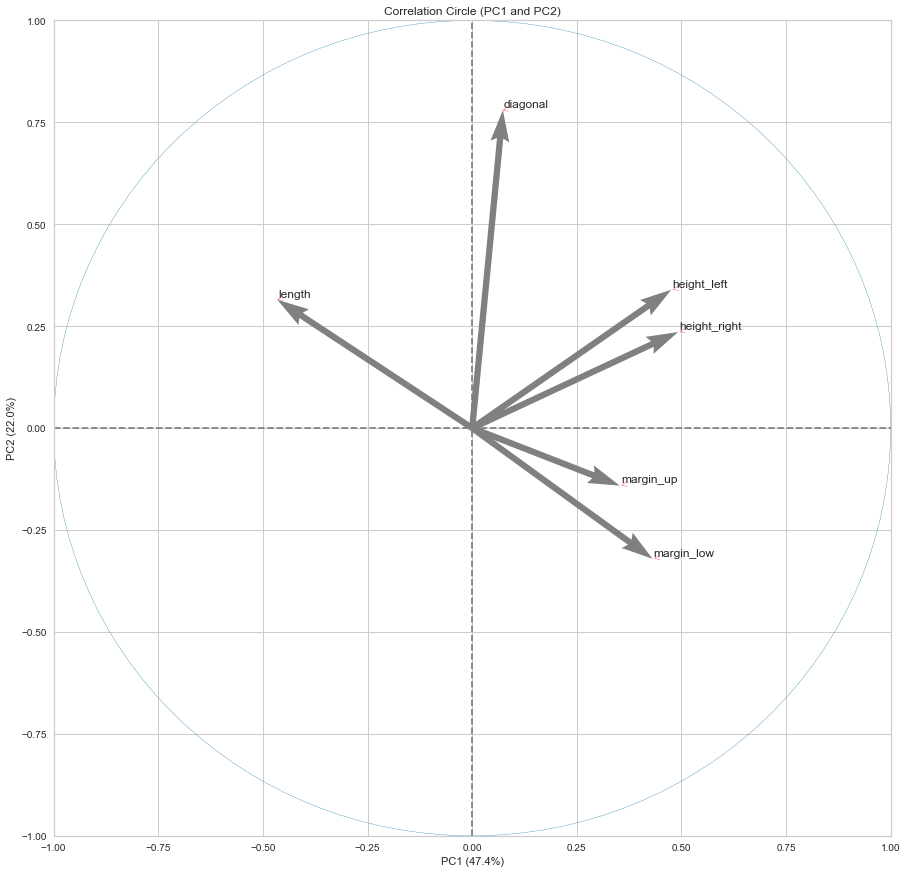

In [138]:

display_circles(pca.components_, pca.n_components, pca, [(0,1)], labels = df_data_numerical.columns, figsize=(15,15))

**Visualizing the calculated seven components to see how they are clustered and correlated.**

We can clearly see here that diagonal, height_left, and height_right are influenced by pc2, and margin_up and margin_low are instead influenced by pc1.

It is also worth mentioning about diagonal and length, a diagonal is not correlating with any of the variables, and length is negatively correlated with margin variables.

Length is weak but more influenced by pc2, but diagonal is strongly influenced by it!

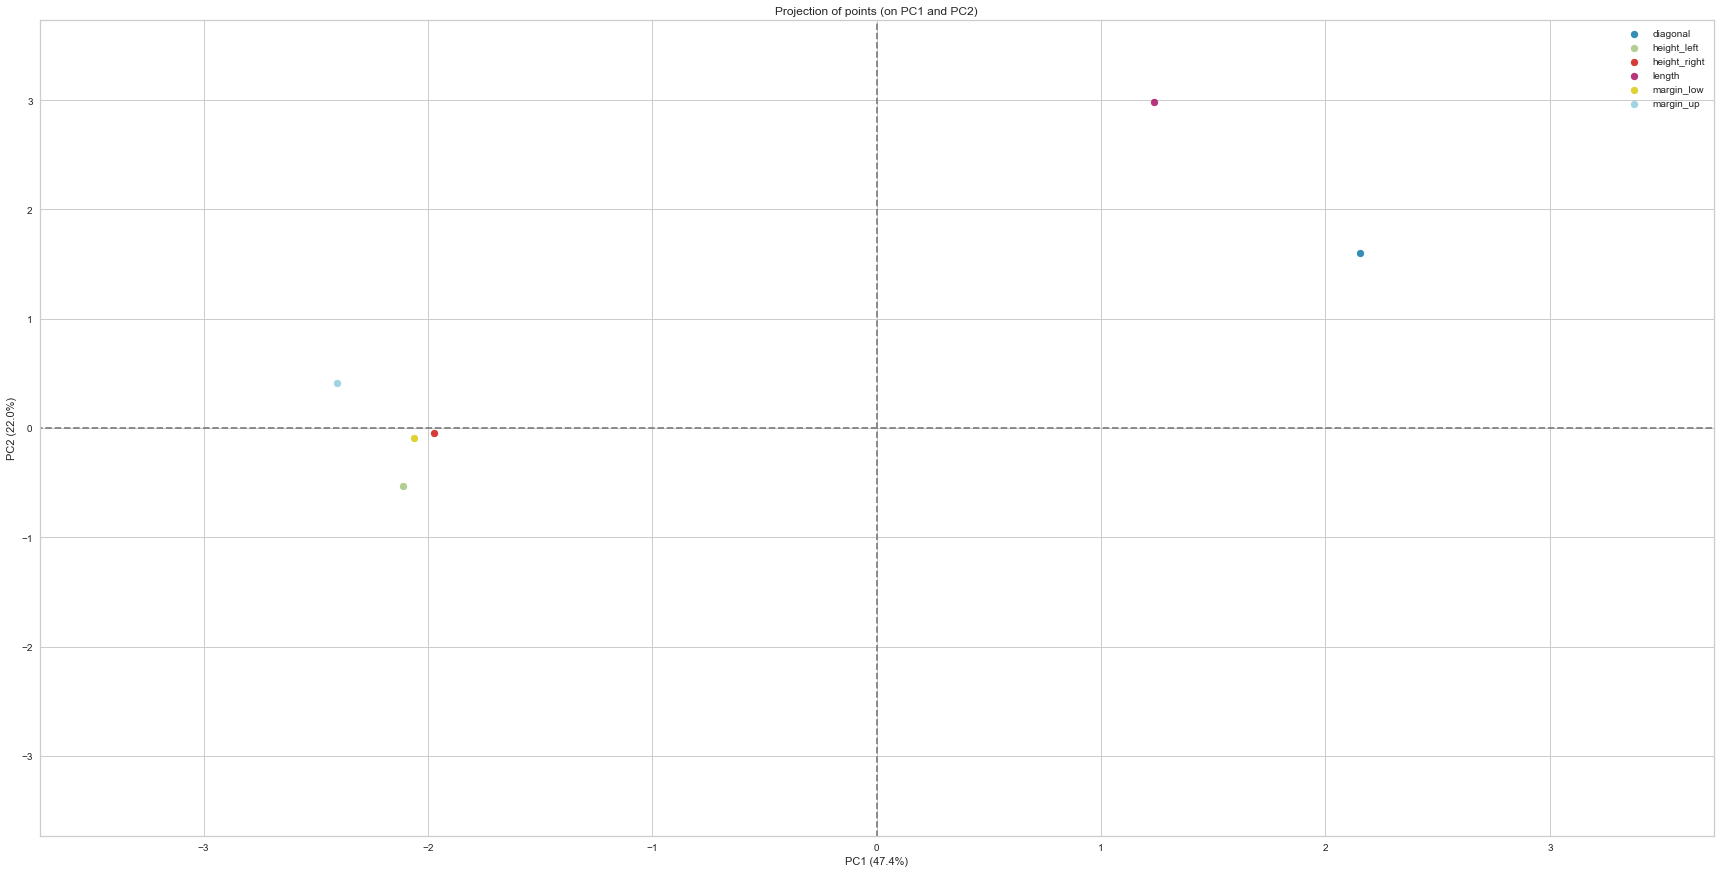

In [139]:

display_factorial_planes(x_reducer, pca.n_components, pca, [(0,1)], illustrative_var=df_data_numerical.columns, alpha=0.8,figsize=(30,15))


Here with another visualization, the factorial planes clearly show how much diagonal and length are more influenced by pc2 and the other variables less.

In [140]:
# Create a k-means clustering model with 2 to 6 clusters.

kmeans = KMeans(init='random', n_clusters=4, n_init=10)

# Fit the data to the Model.
kmeans.fit(X_scaled)

# Determine which clusters each data point belongs to:
clusters =  kmeans.predict(X_scaled)

#### Validating the optimal number of clusters using other metrics.

**Silhouette Metric.**

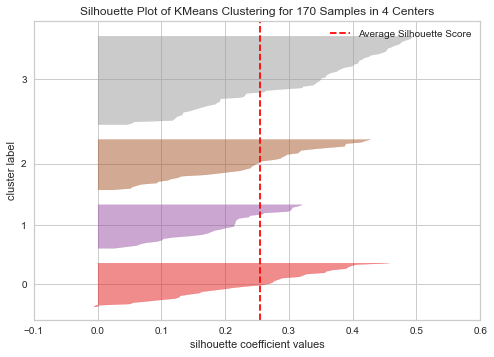

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 170 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [141]:
# Using the yellowbrick library as it has better visualization and more information, this takes our kmeans model direct with or without an optimal number of clusters.

visualizer = yellowbrick.SilhouetteVisualizer(kmeans)

# Fit data for visualizing.
visualizer.fit(X_scaled) 
visualizer.show()

**It indicates an optimal number of 2, but we should run more combinations of the cluster!**

**At this metric Silhouette, the visualization takes into consideration If there are wider fluctuations on each cluster and if they all stand in the given criteria, the silhouette coefficient values.**

Four centers or cluster doesn't pass all criteria for an optimal number of the cluster even if relatively closer, but can the Silhouette find a better number than the elbow metric?

**Run 14 different numbers of kmean clusters at once.**


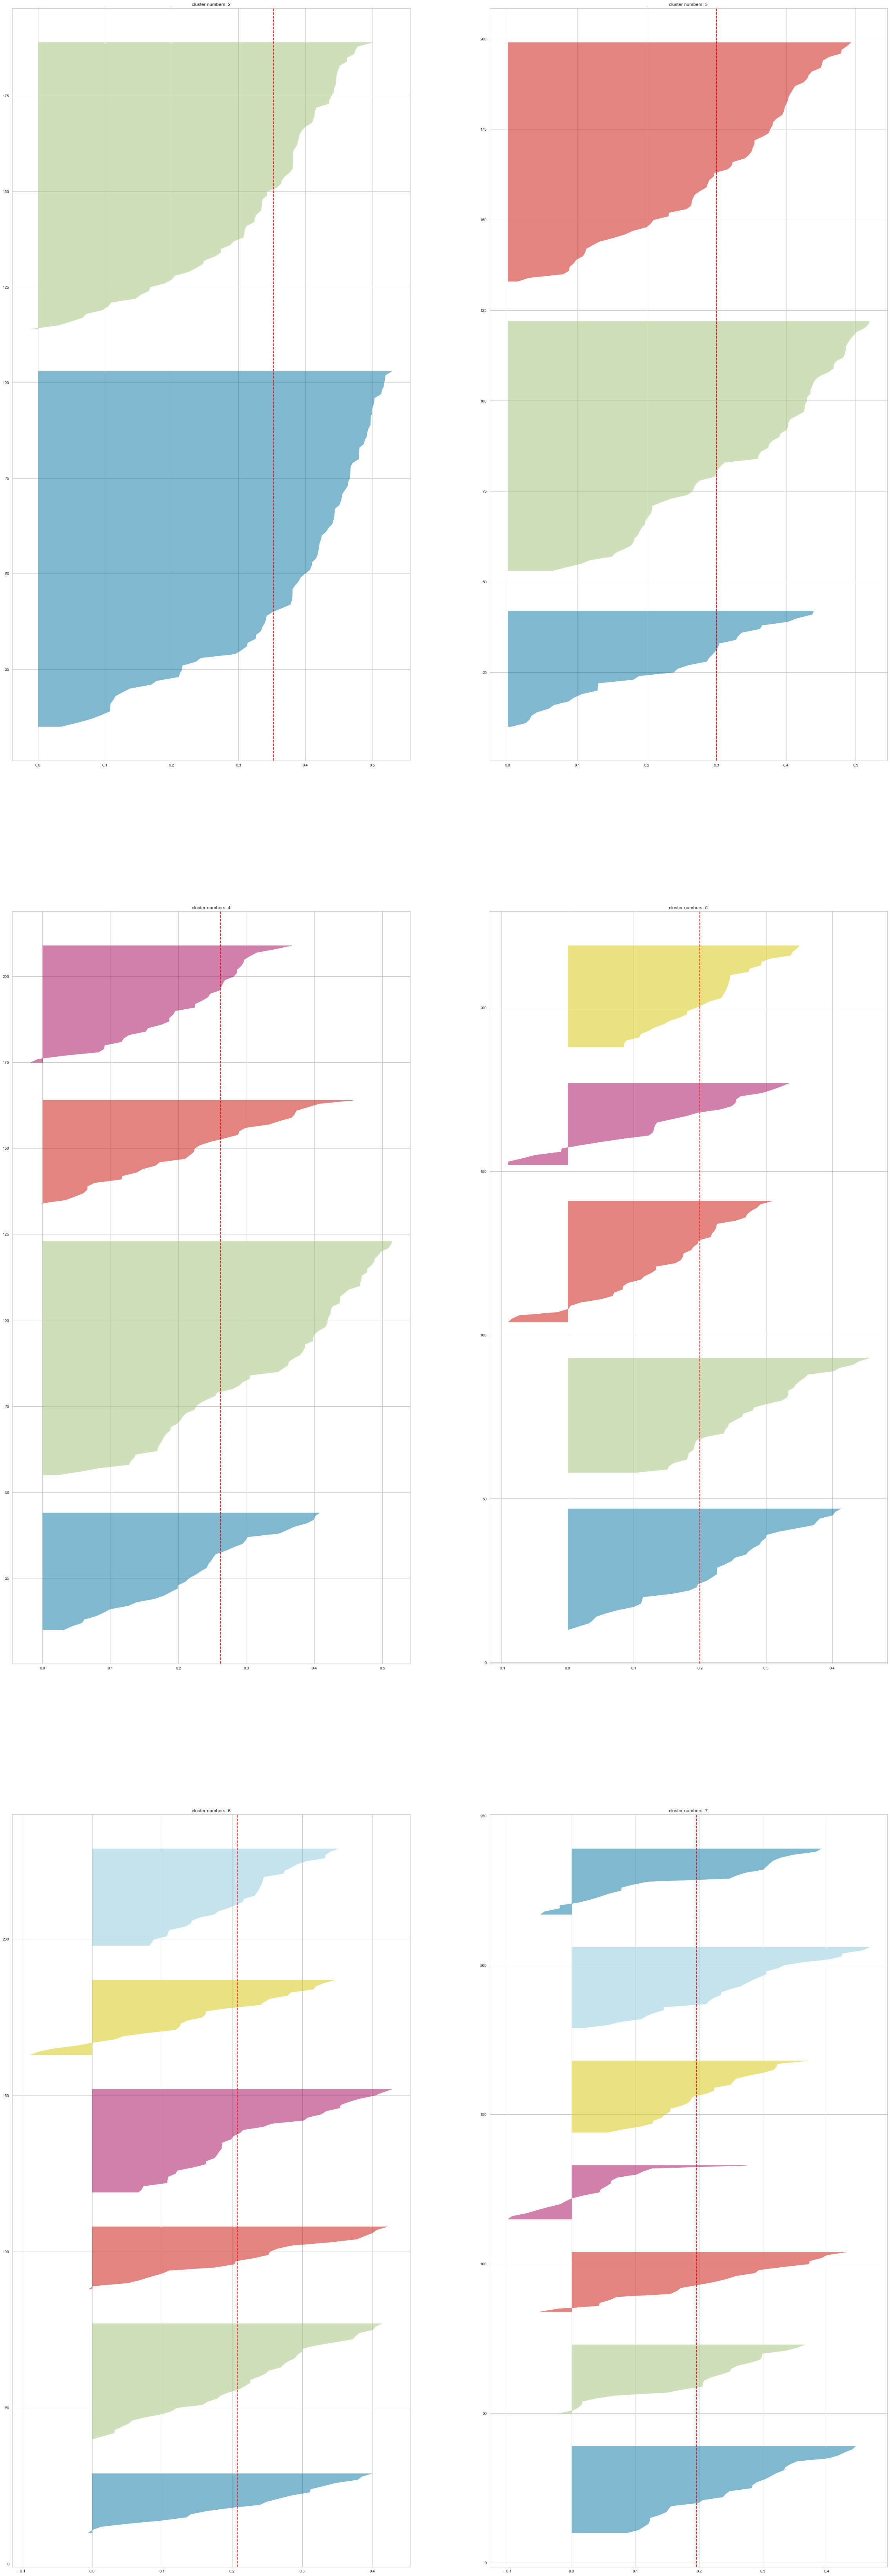

In [142]:
generate_metric_visualizer([2,3, 4,5, 6,7],X_scaled=X_scaled, figsize=(20,80))

**After running the Sihuete.** 

It is clear that the best but also not a justified number of the cluster could be 2,3, even if it is clear that Silhouette can't give a definitive answer here, so let's use another metric and see if they contradict or show a better number!

**Using calinski harabasz metrics.**

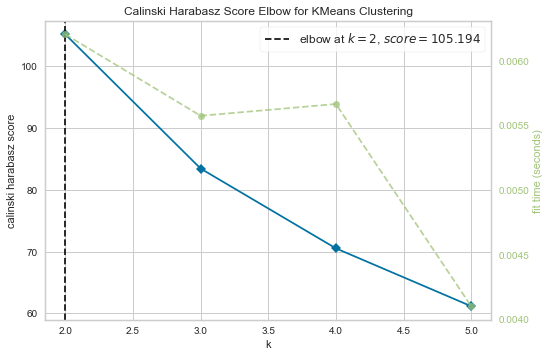

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [143]:
visualizer = yellowbrick.KElbowVisualizer(kmeans, k=(2,6),  metric='calinski_harabasz', timings= True)
visualizer.fit(X_scaled)
visualizer.show() 

**Here, we got an optimal number of 2!**

**The calinski harabasz metric fail.**

It doesn't give a better number because it contradicts by far the Sihuete and Elbow metric given the optimal number of 2 or 3, so let's revalidate the elbow this time with a noncustom function using the same yellowbrick library.

**Using Elbow metrics.**

/Users/kabuquecisouzaalves/opt/anaconda3/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/Users/kabuquecisouzaalves/opt/anaconda3/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


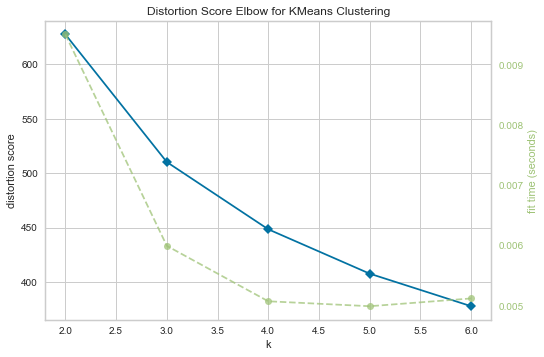

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [144]:
# Using the yellowbrick library as it has better visualization and more information, this takes our kmeans model direct with or without an optimal number of clusters.
visualizer = yellowbrick.KElbowVisualizer(kmeans, k=(2,7),  timings= True)
visualizer.fit(X_scaled)
visualizer.show()

***Summary By taking the mean, we have a number closer to 2 or 3; this is four, so two is definitely not excluded!***


In [145]:
# The median optimal number of clusters is 2 or 3:
opt_num_clusters = int(np.median(np.array([2,2,3,2,3])))
opt_num_clusters

2

**Recreating the kmeans with the new optimal cluster number, which is 2.**

In [146]:
# Create a k-means clustering model with 3 clusters.
kmeans = KMeans(init='random', n_clusters=opt_num_clusters, n_init=10)

# Fit the data to the Model.
kmeans.fit(X_scaled)

# Determine which clusters each data point belongs to.
clusters =  kmeans.predict(X_scaled)

In [147]:
# Creating the centroids reducer
centres_reduced = pca.transform(kmeans.cluster_centers_)

In [148]:
# Get the cluster name.
cluster_name =  pd.Series(clusters).replace({0: 'Cluster_A', 1:'Cluster_B'})

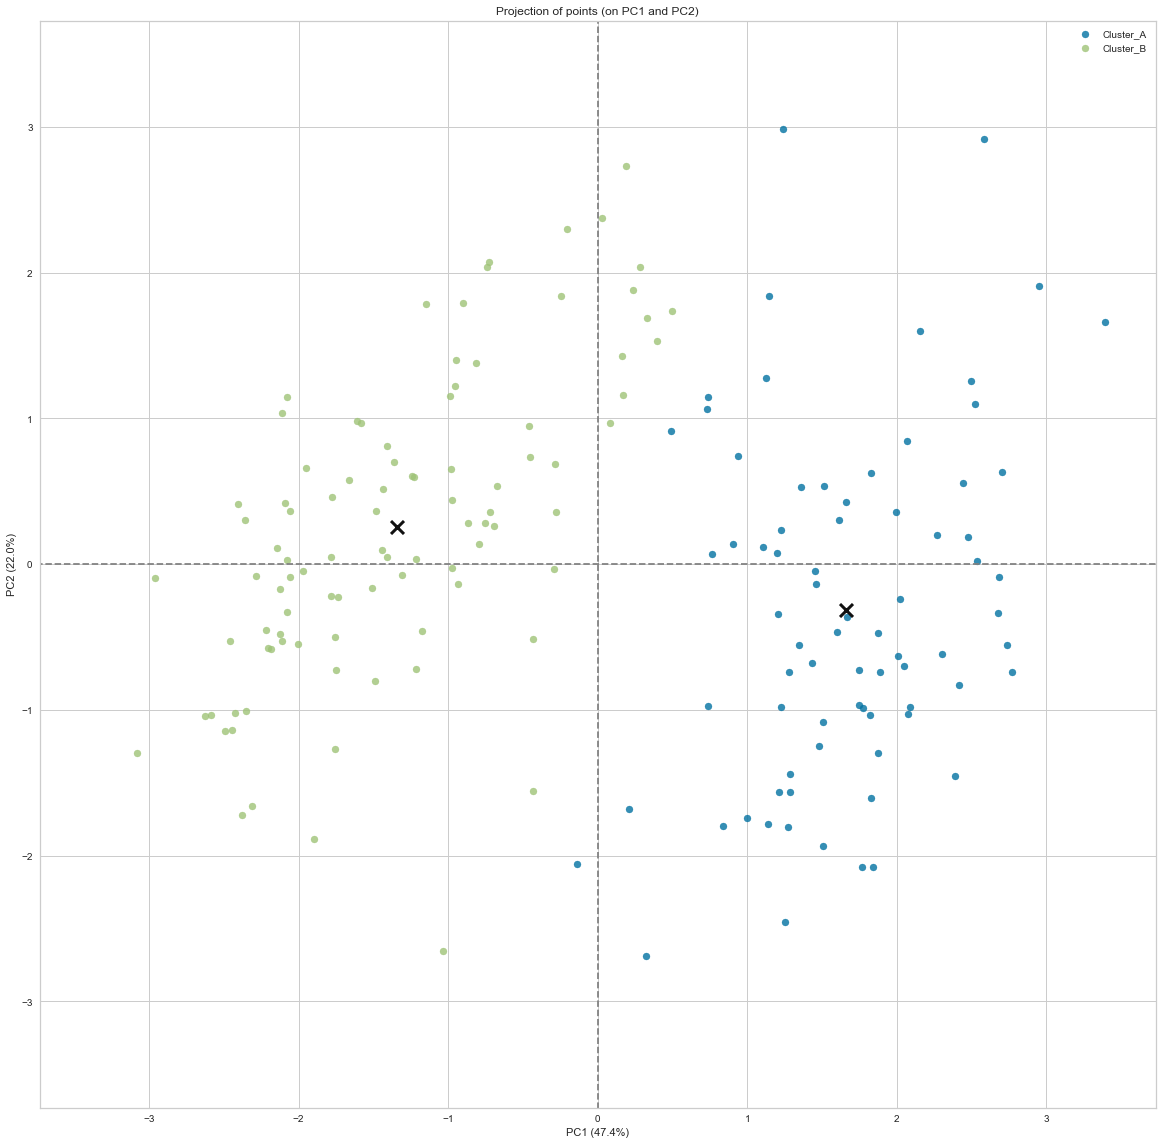

In [149]:
display_factorial_planes(x_reducer, pca.n_components, pca, [(0,1)], illustrative_var = cluster_name, alpha = 0.8, figsize=(20,20))
plt.scatter(centres_reduced[:, 0], centres_reduced[:, 1],
            marker='x', s=169, linewidths=3,
            color='k', zorder=10)

Now we can see where the center of the pcs are located and which one is more influenced by the two different pcs.

Cluster_N_0 data are quite distinct from Cluster_N_1, but overall there is a tendency to be influenced by Cluster_N_ This is clearly seen in the center where some green points meet the blue ones.

In [150]:
# Check how are the cluster center.
kmeans.cluster_centers_

array([[-0.07918471,  0.64514123,  0.71861116,  0.84016633,  0.63084075,
        -0.90264532],
       [ 0.06402168, -0.52160355, -0.58100477, -0.67928342, -0.51004145,
         0.72979834]])

**What are the target variable values on each cluster?**

In [151]:
df_data['cluster'] = kmeans.labels_

In [152]:
df_labels_clusters = pd.DataFrame(data={'cluster': cluster_name, 'True': df_data.loc[df_data.is_genuine == True].is_genuine, 'False': df_data.loc[df_data.is_genuine == False].is_genuine })
df_labels_clusters

,cluster,True,False
0,Cluster_A,True,NaN
1,Cluster_B,True,NaN
2,Cluster_B,True,NaN
3,Cluster_B,True,NaN
4,Cluster_B,True,NaN
...,...,...,...
165,Cluster_A,NaN,False
166,Cluster_A,NaN,False
167,Cluster_A,NaN,False
168,Cluster_A,NaN,False


**Number of true or false genuine at each cluster.**

In [153]:
df_labels_clusters.groupby('cluster').count().reset_index()
# check this false values.

,cluster,True,False
0,Cluster_A,7,69
1,Cluster_B,93,1


# Task 3.

**Apply a classification algorithm and analyze the result. Visualize the resulting scores in the first factorial plane of the PCA and analyze them.**

In [154]:
# Preparing the data model with no categorical variables.
df_data_model = df_data.copy().astype({'is_genuine': 'int'})
df_data_model

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,cluster
0,1,171.81,104.86,104.95,4.52,2.89,112.83,0
1,1,171.67,103.74,103.70,4.01,2.87,113.29,1
2,1,171.83,103.76,103.76,4.40,2.88,113.84,1
3,1,171.80,103.78,103.65,3.73,3.12,113.63,1
4,1,172.05,103.70,103.75,5.04,2.27,113.55,1
...,...,...,...,...,...,...,...,...
165,0,172.11,104.23,104.45,5.24,3.58,111.78,0
166,0,173.01,104.59,104.31,5.04,3.05,110.91,0
167,0,172.47,104.27,104.10,4.88,3.33,110.68,0
168,0,171.82,103.97,103.88,4.73,3.55,111.87,0


**Splitting data, cross-validation.**

In [155]:
# Separating the labels and the observed variables. Splitting the training and test variable. 
X = df_data_numerical
y = df_data_model["is_genuine"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [156]:
# Training and testing!
reg = LogisticRegression()
model = reg.fit(X_train, y_train)
y_pred = model.predict(X_test)

/Users/kabuquecisouzaalves/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [157]:
predicted_res =  model.predict_proba(X_test)

predicted_res

array([[8.83723137e-01, 1.16276863e-01],
       [1.05483284e-02, 9.89451672e-01],
       [9.86129256e-01, 1.38707445e-02],
       [3.58959552e-03, 9.96410404e-01],
       [6.89952579e-01, 3.10047421e-01],
       [9.97086305e-01, 2.91369534e-03],
       [9.92475558e-01, 7.52444181e-03],
       [2.30341366e-01, 7.69658634e-01],
       [9.61143112e-01, 3.88568883e-02],
       [2.96052359e-02, 9.70394764e-01],
       [4.15646658e-02, 9.58435334e-01],
       [9.99468870e-01, 5.31129768e-04],
       [9.92576077e-01, 7.42392322e-03],
       [1.99042400e-02, 9.80095760e-01],
       [1.16344732e-02, 9.88365527e-01],
       [7.68100590e-02, 9.23189941e-01],
       [2.27743799e-02, 9.77225620e-01],
       [9.37796273e-01, 6.22037266e-02],
       [8.28614135e-03, 9.91713859e-01],
       [9.74216076e-01, 2.57839236e-02],
       [1.87618715e-02, 9.81238129e-01],
       [1.29854652e-02, 9.87014535e-01],
       [8.60945366e-03, 9.91390546e-01],
       [1.09332071e-02, 9.89066793e-01],
       [6.784672

**Prediction probability from our trained mode.**

We have a more accurate prediction of our Model that indicate if a composition of feature is genuine or not.

**Model accuracy!**

Our Model looks correct, but here I will verify it in a more objective way by calculating some accuracy tests.

**Checking the two columns as genuine and not genuine.**

In [158]:
pd.DataFrame(data=model.predict_proba(X_test).round(2), columns=['genuine', 'not_genuine'])

,genuine,not_genuine
0,0.88,0.12
1,0.01,0.99
2,0.99,0.01
3,0.00,1.00
4,0.69,0.31
...,...,...
46,0.32,0.68
47,0.02,0.98
48,0.80,0.20
49,0.06,0.94


In [159]:
# Calculating the confusion matrix values for further calculation.
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[20,  0],
       [ 1, 30]])

In [160]:
true_negative, false_positive, false_negative, true_positive = cf_matrix.flatten()

**Verify test data have the train and test don't overlap or have the same data.**

**Calculating all Model scores.**

In [161]:
model_scores = {'accuracy': round(accuracy_score(y_test, model.predict(X_test)), 2), 'precision' : true_positive / (true_positive + true_negative),
'recal' : (true_positive / (true_positive + false_negative)).round(2), 'specificity': (true_negative / (true_negative + false_positive)).round(2),
'f_score': 0
}

model_scores['f_score'] = (2 * (model_scores['precision'] * model_scores['recal']) / (model_scores['precision'] + model_scores['recal'])).round(2)

The Model has an accuracy of 0.98%, Precision sensitivity 0.6%, recall of 0.97%, specificity' 100% and an f_score' of 0.74%!

In [162]:
model_scores

{'accuracy': 0.98,
 'precision': 0.6,
 'recal': 0.97,
 'specificity': 1.0,
 'f_score': 0.74}

**Confusion Matrix.**

The confusion Matrix indicates that the Model is predicting true positives and true negatives correctly.

[Text(0.5, 1.0, 'Confusion matrix with accuracy of: 0.98%,  precision: 0.6%,  recal: 0.97%, specificity: 1.0%, and a f_score of: 0.74% ')]

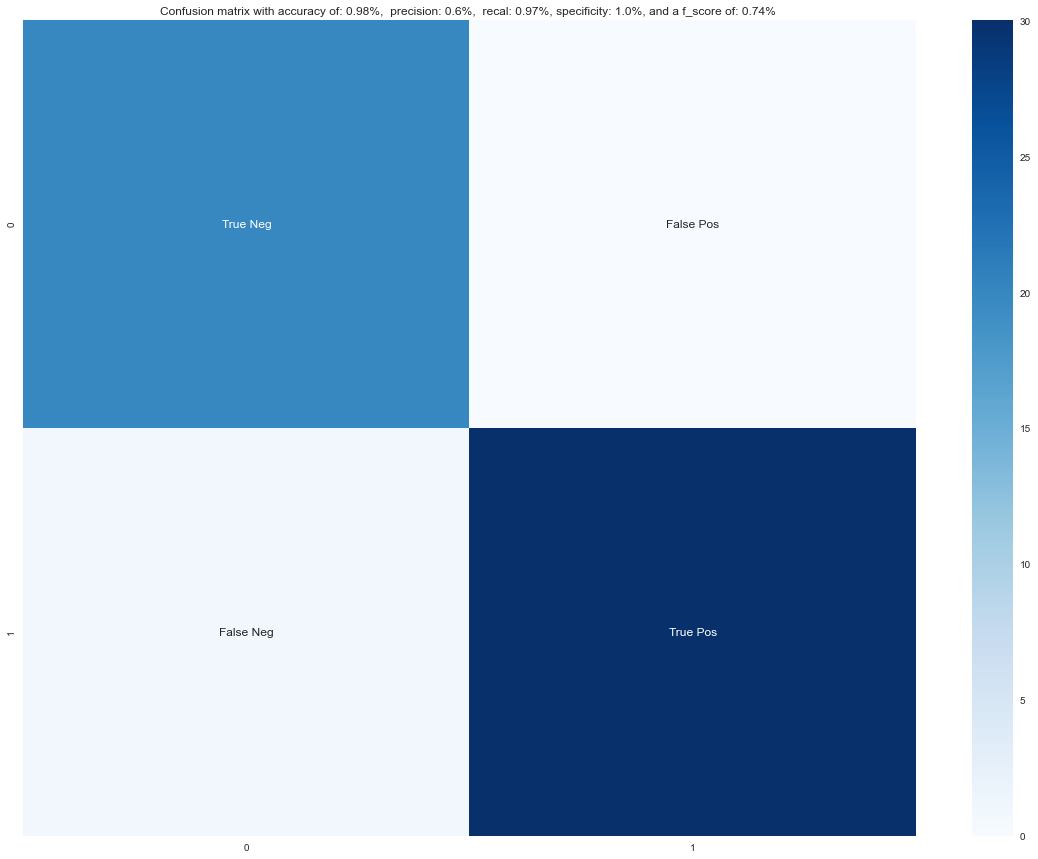

In [163]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(figsize=(20,15))

sns.heatmap(cf_matrix, annot=labels,  fmt='', cmap='Blues', ax=ax).set(title='Confusion matrix with accuracy of: {}%,  precision: {}%,  recal: {}%, specificity: {}%, and a f_score of: {}% '.format(model_scores['accuracy'], model_scores['precision'], model_scores['recal'], model_scores['specificity'], model_scores['f_score']))

Our Model seems to correctly predict the target variable according to the accuracy test above.

But this should be taken into consideration later because it could be a sign of overfitting.

Therefore, later on, I will apply a test data sample to better check the verification validity of our Model. 

**Here, I am having one more check on the distribution of the predict is_genuine and the original one.**

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


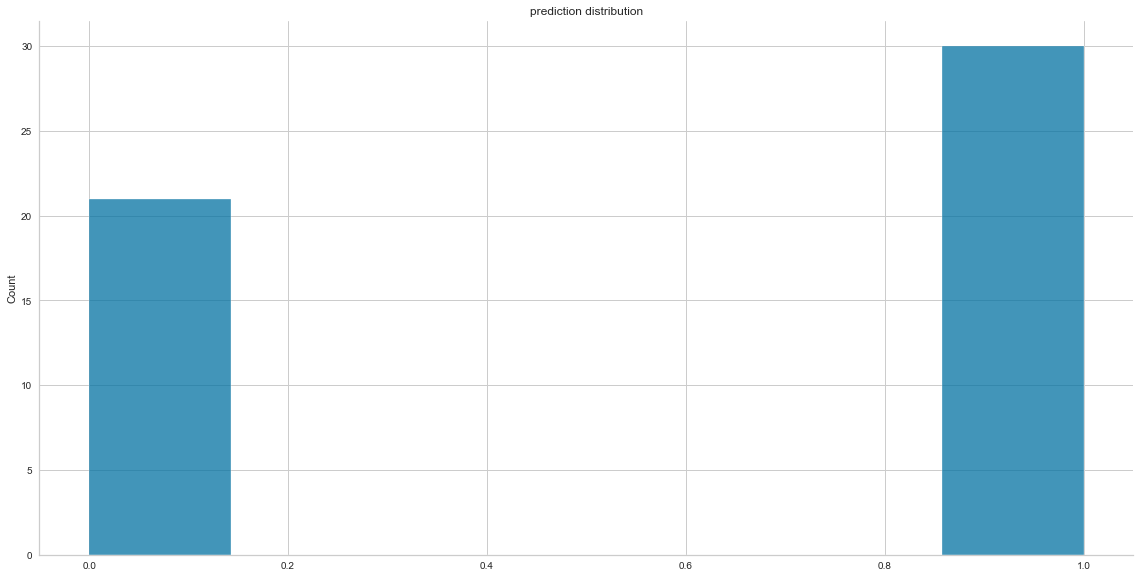

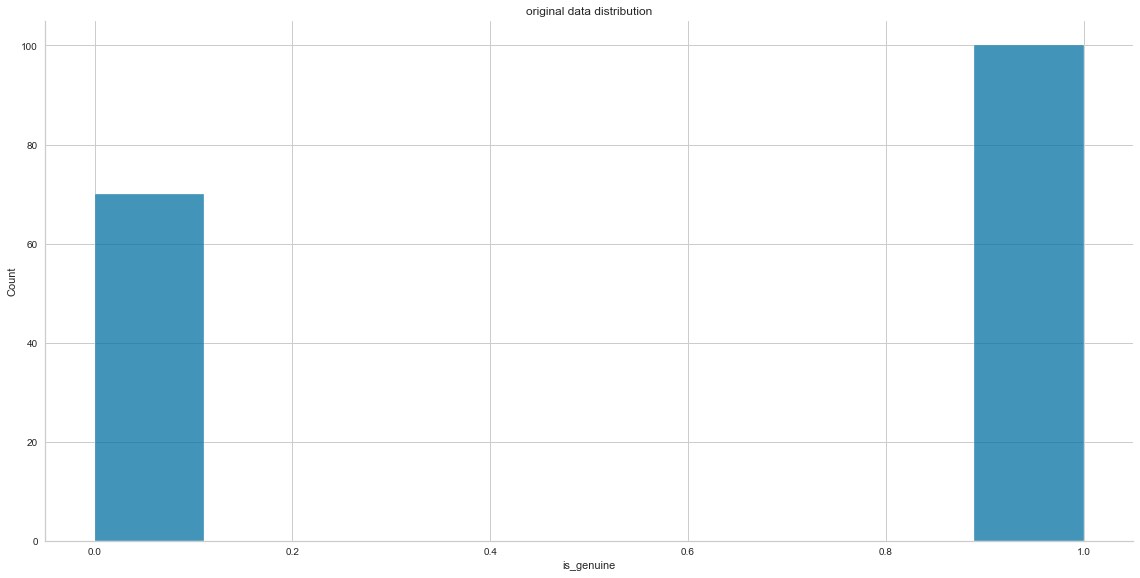

In [164]:
sns.displot(y_pred, height=height, aspect=aspect).set(title='prediction distribution')
sns.displot(df_data.is_genuine, height=height, aspect=aspect).set(title='original data distribution')

*As can be seen, they are virtually the same distribution.*

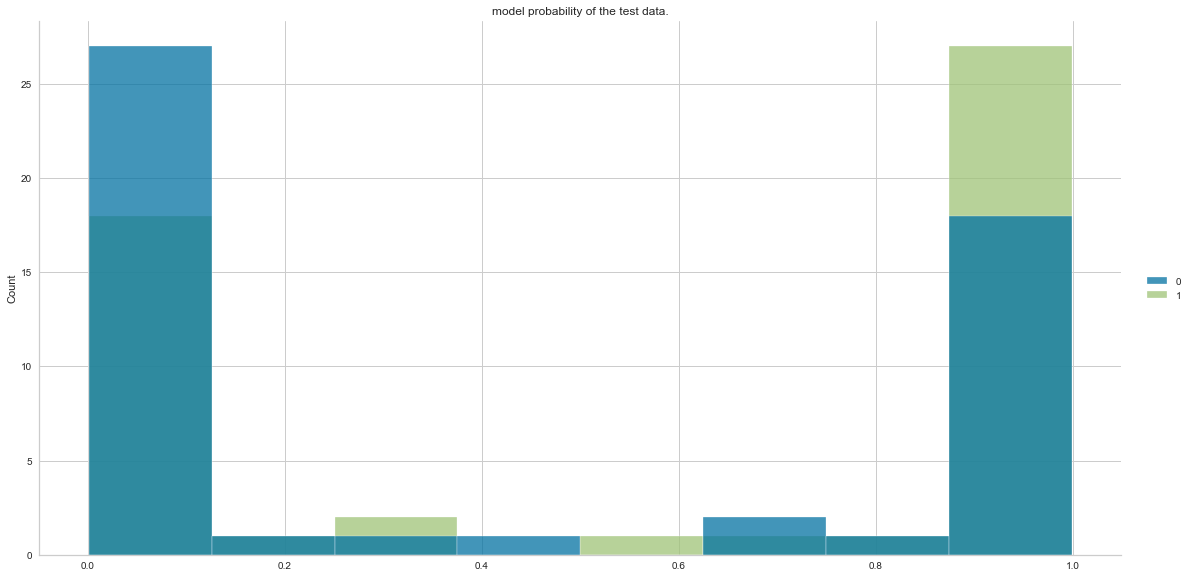

In [165]:
sns.displot(model.predict_proba(X_test), height=height, aspect=aspect).set(title= 'model probability of the test data.')

**More likely to a binary distribution!**

This viz instead shows how clearly the Model separated the false and true values and how they are distributed.

In [166]:
# Creating a data frame for easy display. 
predicted_prob = pd.DataFrame(data=model.predict_proba(X).round(2), columns=['genuine', 'not_genuine'])
predicted_prob

,genuine,not_genuine
0,0.34,0.66
1,0.01,0.99
2,0.01,0.99
3,0.00,1.00
4,0.04,0.96
...,...,...
165,0.98,0.02
166,0.99,0.01
167,0.99,0.01
168,0.87,0.13


Getting the max probability and adding a new column for the data set.

In [167]:
df_data_model['genuine_probability'] = np.max(predicted_prob, axis=1)
df_data_model

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,cluster,genuine_probability
0,1,171.81,104.86,104.95,4.52,2.89,112.83,0,0.66
1,1,171.67,103.74,103.70,4.01,2.87,113.29,1,0.99
2,1,171.83,103.76,103.76,4.40,2.88,113.84,1,0.99
3,1,171.80,103.78,103.65,3.73,3.12,113.63,1,1.00
4,1,172.05,103.70,103.75,5.04,2.27,113.55,1,0.96
...,...,...,...,...,...,...,...,...,...
165,0,172.11,104.23,104.45,5.24,3.58,111.78,0,0.98
166,0,173.01,104.59,104.31,5.04,3.05,110.91,0,0.99
167,0,172.47,104.27,104.10,4.88,3.33,110.68,0,0.99
168,0,171.82,103.97,103.88,4.73,3.55,111.87,0,0.87


Make sure the data set is standardized and transform it!


In [168]:
# Standardize the data and create the scaler variable.
# remove the output var is_genuing.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_data_numerical)
X_scaled

array([[-0.42834385,  2.6694537 ,  3.09656321, -0.13159013, -1.18987367,
         0.28163308],
       [-0.88755932, -1.09769709, -0.69125444, -0.86012554, -1.27473985,
         0.78069736],
       [-0.36274164, -1.03042654, -0.50943919, -0.30301023, -1.23230676,
         1.37740465],
       ...,
       [ 1.73652911,  0.68497248,  0.52084721,  0.38267015,  0.67718214,
        -2.05094997],
       [-0.39554274, -0.32408577, -0.1458087 ,  0.16839504,  1.61071005,
        -0.75989238],
       [ 0.06367273, -0.22317994,  0.06630909,  1.45404575,  0.38015054,
        -1.74717171]])

In [169]:
# Add the variable to the PCA result as a clustered data frame.
x_clustered = pd.DataFrame(X_scaled, index= df_data_numerical.index, columns= df_data_numerical.columns)

x_clustered.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,-0.428344,2.669454,3.096563,-0.131590,-1.189874,0.281633
1,-0.887559,-1.097697,-0.691254,-0.860126,-1.274740,0.780697
2,-0.362742,-1.030427,-0.509439,-0.303010,-1.232307,1.377405
3,-0.461145,-0.963156,-0.842767,-1.260106,-0.213913,1.149571
4,0.358883,-1.232238,-0.539742,0.611230,-3.820725,1.062777


**Creating the PCA and the reduced variable.**


In [170]:
pca = PCA(n_components = 2)
pca.fit(X_scaled)
x_reducer = pca.transform(X_scaled)
x_reducer

array([[ 2.15363875,  1.59970945],
       [-2.11041589, -0.52603892],
       [-1.97315242, -0.04810178],
       [-2.05979509, -0.08910521],
       [-2.40318009,  0.41216977],
       [ 1.23565611,  2.98319112],
       [-2.07941191,  1.14797998],
       [-2.62393408, -1.04013317],
       [-1.73630901, -0.227631  ],
       [ 0.72748966,  1.06388107],
       [ 0.49582635,  1.73847781],
       [-2.09026468,  0.41670968],
       [ 0.16022666,  1.43072514],
       [-1.51099968, -0.16606   ],
       [-1.24242842,  0.60216942],
       [-1.75333312, -0.50267375],
       [-1.21324817,  0.03566659],
       [-1.66473154,  0.57778357],
       [-1.48336646,  0.36363733],
       [-0.75344444,  0.28241819],
       [-1.78026387,  0.04851185],
       [ 0.03144616,  2.37337698],
       [ 0.32912853,  1.68824072],
       [-0.20619611,  2.30300194],
       [-1.22566926,  0.59722119],
       [ 0.23751564,  1.88390247],
       [-0.72903068,  2.07182053],
       [ 0.08123469,  0.96744265],
       [-0.95290722,

**Ploting the PCA factorial plane!**


/Users/kabuquecisouzaalves/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Projection of points (on PC1 and PC2)'}, xlabel='PC1 (47.4%)', ylabel='PC2 (22.0%)'>

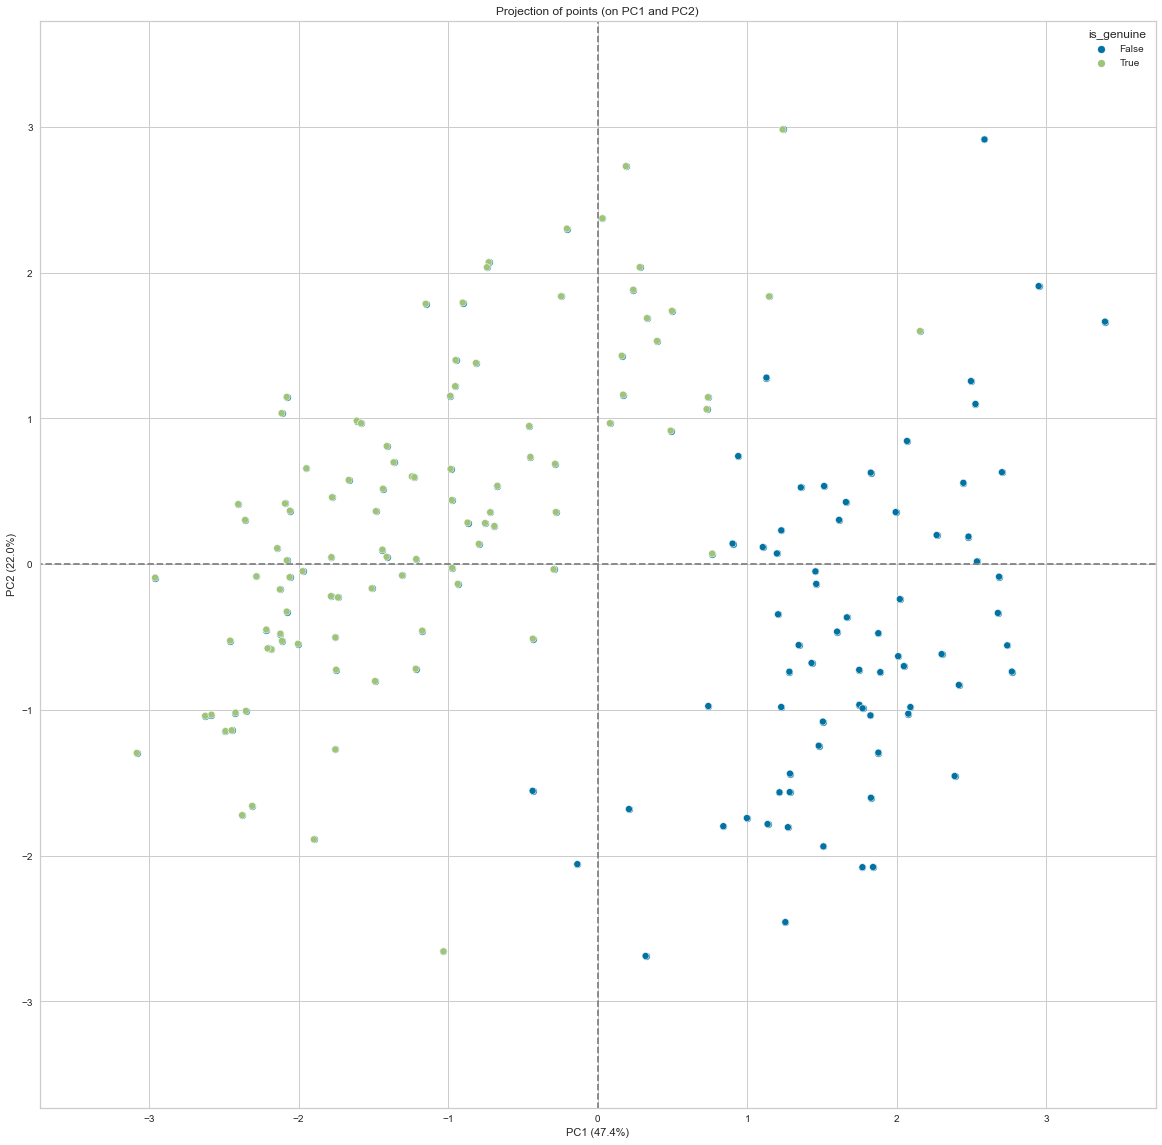

In [171]:
display_factorial_planes(x_reducer, pca.n_components, pca, [(0,1)],  alpha = 0.8, figsize=(20,20))

sns.scatterplot(x_reducer[:,0], x_reducer[:,1], hue=df_data.is_genuine)

**And this is our result.**

The variable's values look like they rotate clockwise, and the correlation is a little weaker, but the distinction between true and false is quite well preserved.

*PCs, regarding the pc1, we can clearly see which pc they belonged to. The true value are in pc2 and the false in pc1.*

# Task 4.

**Model the data. You will then create a program that can determine if a note is genuine or counterfeit.**

In [172]:
# Renaming the cluster to a better-recognizing name.

df_data_model.cluster = df_data_model.cluster.map({0: 'A1', 1: 'A2'})
df_data_model

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,cluster,genuine_probability
0,1,171.81,104.86,104.95,4.52,2.89,112.83,A1,0.66
1,1,171.67,103.74,103.70,4.01,2.87,113.29,A2,0.99
2,1,171.83,103.76,103.76,4.40,2.88,113.84,A2,0.99
3,1,171.80,103.78,103.65,3.73,3.12,113.63,A2,1.00
4,1,172.05,103.70,103.75,5.04,2.27,113.55,A2,0.96
...,...,...,...,...,...,...,...,...,...
165,0,172.11,104.23,104.45,5.24,3.58,111.78,A1,0.98
166,0,173.01,104.59,104.31,5.04,3.05,110.91,A1,0.99
167,0,172.47,104.27,104.10,4.88,3.33,110.68,A1,0.99
168,0,171.82,103.97,103.88,4.73,3.55,111.87,A1,0.87


**Saving the Model!**


In [173]:
path_data_file = './data/model.pickel'
pk.dump(model, open(path_data_file, 'wb'))

**Loading and reusing the Model for sample test prediction.**

In [174]:
model_progam = pk.load(open(path_data_file, 'rb'))

Saving the test data sample.

In [175]:
path_data_file = './data/sample_test_data.csv'
df_data.sample(frac=0.5).to_csv(path_data_file)
df_data_test = pd.read_csv(path_data_file, usecols=df_data_numerical.columns)

In [176]:
df_data_test

,diagonal,height_left,height_right,margin_low,margin_up,length
0,172.75,104.33,103.97,4.34,3.14,113.12
1,171.69,104.17,104.37,5.31,3.54,111.89
2,171.67,104.16,104.08,5.42,3.30,111.63
3,172.22,104.41,104.64,5.20,3.37,112.20
4,172.16,104.43,104.06,4.51,3.19,112.69
...,...,...,...,...,...,...
80,171.75,104.16,104.23,5.75,3.25,111.68
81,172.53,103.99,103.55,4.50,3.10,113.03
82,172.22,104.48,104.06,4.59,2.91,112.82
83,172.24,104.51,103.97,4.18,3.22,113.21


**Running sample test data against our Model!**


In [177]:
model_progam.predict(df_data_test)

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1])

In [178]:
# Creating a data frame for easy display. 
predicted_prob = pd.DataFrame(data=model.predict_proba(df_data_test).round(17), columns=['genuine', 'not_genuine'])
predicted_prob

,genuine,not_genuine
0,0.083374,0.916626
1,0.975608,0.024392
2,0.983619,0.016381
3,0.937796,0.062204
4,0.319475,0.680525
...,...,...
80,0.991943,0.008057
81,0.095790,0.904210
82,0.230341,0.769659
83,0.056465,0.943535


In [179]:
df_data_test = pd.concat([df_data_test, predicted_prob], axis=1)
df_data_test

,diagonal,height_left,height_right,margin_low,margin_up,length,genuine,not_genuine
0,172.75,104.33,103.97,4.34,3.14,113.12,0.083374,0.916626
1,171.69,104.17,104.37,5.31,3.54,111.89,0.975608,0.024392
2,171.67,104.16,104.08,5.42,3.30,111.63,0.983619,0.016381
3,172.22,104.41,104.64,5.20,3.37,112.20,0.937796,0.062204
4,172.16,104.43,104.06,4.51,3.19,112.69,0.319475,0.680525
...,...,...,...,...,...,...,...,...
80,171.75,104.16,104.23,5.75,3.25,111.68,0.991943,0.008057
81,172.53,103.99,103.55,4.50,3.10,113.03,0.095790,0.904210
82,172.22,104.48,104.06,4.59,2.91,112.82,0.230341,0.769659
83,172.24,104.51,103.97,4.18,3.22,113.21,0.056465,0.943535


*That we have, a model that can accurately predict money features based on our original data set.*

This Model can then be used in any application that gives the same data features as input, and the Model will predict it accordingly.

In [180]:
path_data_file = './data/test_data.csv'
df_data_test = pd.read_csv(path_data_file)
df_data_test

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [181]:
model_progam.predict(df_data_test[df_data_numerical.columns])

array([0, 0, 0, 1, 1])

In [182]:
model_progam.predict_proba(df_data_test[df_data_numerical.columns])

array([[0.97520568, 0.02479432],
       [0.9883041 , 0.0116959 ],
       [0.97339471, 0.02660529],
       [0.10508993, 0.89491007],
       [0.0082649 , 0.9917351 ]])

diagonal,height_left,height_right,margin_low,margin_up,length,
is_genuine
proba_genuine

In [183]:
is_genuine = model_progam.predict(df_data_test[df_data_numerical.columns])

In [184]:
# Creating a data frame for easy display. 
predicted_prob = pd.DataFrame(data=model.predict_proba(df_data_test[df_data_numerical.columns]).round(20), columns=['not_genuine', 'genuine'])
predicted_prob

,not_genuine,genuine
0,0.975206,0.024794
1,0.988304,0.011696
2,0.973395,0.026605
3,0.105090,0.894910
4,0.008265,0.991735


In [185]:
df_data_test['is_genuine'] =  model_progam.predict(df_data_test[df_data_numerical.columns])


In [186]:
df_data_test = pd.concat([df_data_test, predicted_prob.genuine], axis=1)
df_data_test.is_genuine = df_data_test.is_genuine.astype(dtype=bool)

In [187]:
df_data_test

,diagonal,height_left,height_right,margin_low,margin_up,length,id,is_genuine,genuine
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,False,0.024794
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,False,0.011696
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,False,0.026605
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,True,0.894910
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,True,0.991735
